# Features extraction


From name column - 
home or apartment or cabin or guest suite , this is not the exhaustive list,  need to write code to get all the types  :   kinnary 
superhost - or not - boolean column
create a price column - number , take max(actual, price per night)
beds -  no of beds,  king  boolean column, queen boolean column
ratings - is for filtering
sp_url - drop it 
location -  place, city, state 
-  all of the above : siva, mahathi, aboorva 


unit rental details + number of guests  - by how many people house is hosted by, no of bedrooms, guests,  no of beds_from_details
-  meghna 

description -  creating columns by doing word frequceny analysisor topic_modelling,  cosine similarity of image labels and description  :  rithu

amenities - create columns for all unique amenities (also making sure we are doing word replacement before ccreating columns. ex: creating one column ocean view for (ocean view, sea view, beach view)   -  aboorva

image labels - a list of all labels from all images of a listing    - kinnary 
host_about : bool column for whether host_about is there or not  - kinnary 

In [1]:
# !pip3 install lda

In [1]:
#Import statements
import pandas as pd

import os, csv, nltk, json, lda
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import numpy as np
import sys
import time
import spacy

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('all')
import requests
import re

from scipy import sparse
from sklearn.feature_extraction.text import CountVectorizer


C:\Users\ADMIN\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron

[nltk_data]    |   Package maxent_ne_chunker is already up-to-date!
[nltk_data]    | Downloading package maxent_treebank_pos_tagger to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package maxent_treebank_pos_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package moses_sample to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\U

In [2]:
import matplotlib.pyplot as plt
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer,word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

In [3]:
df = pd.read_csv('Airbnb_scraper.csv')

In [9]:
df.shape

(7395, 18)

In [5]:
df.columns

Index(['url', 'description', 'name', 'superhost', 'price per night',
       'actual price', 'beds', 'rating', 'sp_url', 'location',
       'unit rental details', 'number of guests', 'more description',
       'amenities1', 'rental_data', 'all_amenities', 'image_urls',
       'host_about'],
      dtype='object')

In [8]:
df=df.drop_duplicates(subset='url', keep="last")

In [7]:
#df=df[df.all_amenities != '[]']

### Type of listing

In [10]:
df['name_list'] = df.apply(lambda x : x['name'].split(), axis = 1)
df['name_type'] = df.apply(lambda x : [x['name_list'][i] for i in range(0, len(x['name_list'])) if i < x['name_list'].index('in')][0], axis = 1)

In [11]:
#df['hosted_list'] = df.apply(lambda x : x['host_about'].split(), axis = 1)

###  Price column - number , take max(actual, price per night), beds - no of beds, king boolean column, queen boolean column ratings - is for filtering sp_url - drop it location - place, city, state

In [12]:
#dropping sp_url
df=df.drop('sp_url', axis=1)

In [13]:
#filtering based on rating
df=df[df.rating != "empty"]

In [14]:
df.shape

(6405, 19)

In [15]:
# making superhost as integer
df.loc[df["superhost"] == "Superhost", "superhost"] = 0
df.loc[df["superhost"] == "empty", "superhost"] = 1
df.loc[df["superhost"] == "Plus", "superhost"] = 2

In [16]:
df['superhost'].unique()

array([1, 0, 2], dtype=object)

In [17]:
df['superhost'] = df['superhost'].astype(int)

In [18]:
datatypes = df.dtypes['superhost']
datatypes

dtype('int32')

In [19]:
def price_func(row):
    if row['actual price'] != "empty" :
        return row['actual price']
    else:
        return row['price per night']
df['price']=df.apply(lambda row: price_func(row), axis=1)

In [20]:
# def priceFormat(row):
#     try:
#         #return int(''.join(e for e in row if e.isalnum()))
#         return int((str(row).split("$")[1]).replace(",", ""))
#     except:
#         return 0
df['price']=df['price'].apply(lambda x : int(''.join(e for e in x if e.isdigit())))

In [21]:
#df.loc[df['price'] == 0]
#df['price'] 

In [22]:
new=df['location'].str.split(",", n = 2, expand = True)
df['city']=new[0]
df['state']=new[1]

In [23]:
new=df['beds'].str.split(" ", n = 1, expand = True)
#df['beds_count']=new[0]
df['bed_type']=new[1]

In [24]:
df.loc[df["bed_type"] == "queen beds", "bed_type"] = 'queen bed'
df.loc[df["bed_type"] == "king beds", "bed_type"] = 'king bed'
df.loc[df["bed_type"] == "double beds", "bed_type"] = 'double bed'
df.loc[df["bed_type"] == "beds", "bed_type"] = 'bed'
df.loc[df["bed_type"].isnull() , "bed_type"] = 'not mentioned'
df.loc[~df['bed_type'].str.contains('bed'), 'bed_type'] = 'not mentioned'

In [25]:
#df["beds_count"].unique()

### Meghna

In [26]:
# df_splited_guests = pd.DataFrame(df['number of guests'].apply(lambda guest: guest.split('¬∑ **__** ¬∑')))
# string='4 guests ¬∑ **__** ¬∑ 2 bedrooms ¬∑ **__** ¬∑ 3 beds ¬∑ **__** ¬∑ 1.5 baths**__**Joined in February 2015**__**Privacy¬∑**__**¬∑Terms¬∑**__**¬∑Sitemap**__**Privacy¬∑**__**¬∑Terms¬∑**__**¬∑Sitemap**__**Privacy¬∑**__**¬∑Terms¬∑**__**¬∑Sitemap'
# new=''.join(e for e in string if e.isalnum() or e=='.')
# print(new)
# if 'guest' in new:
#     guests_index=new.index('guests')
#     print(new[0:guests_index])
# if 'bedroom' in new:
#     bedroom_index=new.index('bedroom')
#     bedrm_index=new[bedroom_index-2:bedroom_index]
#     print(''.join(e for e in bedrm_index if e.isdigit()))
#     if 'bed' in new:
#     #find_after_index(bedroom_index+5, 'bed')
#         bed_index=new.find('bed',bedroom_index+5)
#         bed_index1=new[bed_index-2:bed_index]
#         print(''.join(e for e in bed_index1 if e.isdigit()))
# if 'studio' in new:
#     studio_index=new.index('Studio')
#     std_index=new[studio_index-2:studio_index]
#     print(''.join(e for e in std_index if e.isdigit()))
#     if 'bed' in new:
#     #find_after_index(bedroom_index+5, 'bed')
#         bed_index=new.find('bed',std_index+4)
#         bed_index1=new[bed_index-2:bed_index]
#         print(''.join(e for e in bed_index1 if e.isdigit()))
# if 'bath' in new:
#     bath_index=new.index('bath')
#     no_of_bath = new[bath_index-3:bath_index]
#     print(''.join(e for e in no_of_bath if e.isdigit() or e=='.'))
    
# if new.contains('guest'):
#     guest_index=new.index('guest')
# if new.contains('bedrooms'):
#     guests_index=new.index('bedrooms')
# if new.contains('bedroom'):
#     guest_index=new.index('bedroom')
    



        
#df['price']=df['price'].apply(lambda x : int((str(x).split("$")[1]).replace(",", "")))


In [27]:
def num_of_guests(x):
    list1=[]
    new=''.join(e for e in x if e.isalnum() or e=='.')
    #print(new)
    if 'guest' in new:
        guests_index=new.index('guest')
        list1.append(new[0:guests_index])
    else:
        list1.append(0)
    if 'bedroom' in new:
        bedroom_index=new.index('bedroom')
        bedrm_index=new[bedroom_index-2:bedroom_index]
        list1.append(''.join(e for e in bedrm_index if e.isdigit()))
        if 'bed' in new:
        #find_after_index(bedroom_index+5, 'bed')
            bed_index=new.find('bed',bedroom_index+5)
            bed_index1=new[bed_index-2:bed_index]
            list1.append(''.join(e for e in bed_index1 if e.isdigit()))
        else:
            list1.append(0)
    
    elif 'Studio' in new:
        studio_index=new.index('Studio')
        std_index=new[studio_index-2:studio_index]
        #list1.append(''.join(e for e in std_index if e.isdigit()))
        list1.append(1)
        if 'bed' in new:
        #find_after_index(bedroom_index+5, 'bed')
            bed_index=new.find('bed',studio_index)
            bed_index1=new[bed_index-2:bed_index]
            list1.append(''.join(e for e in bed_index1 if e.isdigit()))
        else:
            list1.append(0)
    else:
        list1.append(0)
    if 'Half-bath' in new:
        bath_index=new.index('Half-bath')
        no_of_bath = new[bath_index-3:bath_index]
        list1.append(''.join(e for e in no_of_bath if e.isdigit() or e=='.'))
    elif 'bath' in new:
        bath_index=new.index('bath')
        no_of_bath = new[bath_index-3:bath_index]
        list1.append(''.join(e for e in no_of_bath if e.isdigit() or e=='.'))
        
    else:
        list1.append(0)
    return list1

guest_df=df['number of guests'].apply(lambda x : num_of_guests(x))

In [28]:
def bath_func(x):
    try:
        return x[3]
    except:
        return 0
df['guests_count']=guest_df.apply(lambda x: x[0])
df['bedrooms']=guest_df.apply(lambda x: x[1])
df['beds_count']=guest_df.apply(lambda x: x[2])

df['bath']=guest_df.apply(lambda x: bath_func(x))


In [29]:
def type_set(x):
    try:
        return int(x)
    except:
        return int(0)
df['guests_count'] = df['guests_count'].astype('int')
df['bedrooms'] = df['bedrooms'].apply(lambda x: type_set(x))
df['beds_count'] = df['beds_count'].apply(lambda x: type_set(x))
df['bath'] = df['bath'].apply(lambda x: type_set(x))

In [30]:
# for idx, row in df_splited_guests.iterrows():
#     for row_list in row:
#         if len(row_list) < 4:
#             df.loc[idx, 'beds'] = '0'
#         for val in row_list:
#             if 'guest' in val:
#                 df.loc[idx, 'guests'] = val.split(' ')[0]
#             elif 'bedroom' in val:
#                 df.loc[idx, 'bedrooms'] = val.split(' ')[1]
#             elif 'Studio' in val:
#                 df.loc[idx, 'bedrooms'] = '1'
#             elif 'bed' in val:
#                 df.loc[idx, 'beds'] = val.split(' ')[1]
#             elif 'bath' in val:
#                 df.loc[idx, 'baths'] = val.split(' ')[1]
#             elif 'Half-bath' in val:
#                 df.loc[idx, 'baths'] = '0.5'

In [31]:
# for idx, row in df[['unit rental details']].iterrows():
#     for val in row:
#         if ' And ' in val:
#             df.loc[idx, 'number of hosts'] = len(val.split(' And '))
#         elif '&' in val:
#             df.loc[idx, 'number of hosts'] = len(val.split('&'))
#         else:
#             df.loc[idx, 'number of hosts'] = '1'

In [30]:
#df['bedrooms'].fillna('0', inplace=True)

In [31]:
# df['baths'] = df['baths'].replace('Half-bath', 0.5)
# df['baths'] = df['baths'].replace('Half-bath**__**Joined', 0.5)

In [32]:
# lst = ['1', '2', '3', '4', '5', '6']
# df.query('bedrooms not in @lst')


In [33]:
# df['guests'] = df['guests'].astype(int)
# df['beds'] = df['beds'].astype(int)
# df['bedrooms'] = df['bedrooms'].astype(int)
# df['baths'] = df['baths'].astype(float)
df.columns

Index(['url', 'description', 'name', 'superhost', 'price per night',
       'actual price', 'beds', 'rating', 'location', 'unit rental details',
       'number of guests', 'more description', 'amenities1', 'rental_data',
       'all_amenities', 'image_urls', 'host_about', 'name_list', 'name_type',
       'price', 'city', 'state', 'bed_type', 'guests_count', 'bedrooms',
       'beds_count', 'bath'],
      dtype='object')

In [34]:
# df[['guests', 'bedrooms', 'beds', 'baths', 'number of hosts']]

### Amenities

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
stop_words = set(stopwords.words('english'))

In [34]:
import math
def returns_amenities(amenities, amenities_list):
    if amenities_list == '[]' :
        try:
            if math.isnan(amenities):
                return np.nan
        except Exception as e:
            return amenities.lower().split('**__**')
    else:
        final_list = []
        am_list = amenities_list.lower().replace('[', '').replace(']','').replace("'", '').split(',')
        for am_l in am_list:
            if 'not included' not in am_l and 'unavailable' not in am_l:
                final_list = final_list + am_l.split('\\n')
        return final_list

In [35]:
df['all_amenities'] = df.apply(lambda row: returns_amenities(row.amenities1, row.all_amenities ) ,axis=1)
df['all_amenities']

0       [bathroom, bathtub, outdoor shower, hot water,...
1       [scenic views, courtyard view,  bathroom, bath...
8       [bathroom, hair dryer, shampoo, hot water,  be...
9       [bathroom, bathtub, shampoo, hot water,  bedro...
11      [scenic views, ocean view, park view, beach vi...
                              ...                        
9341    [bathroom, bathtub, hair dryer, cleaning produ...
9342    [bathroom, shampoo, hot water,  bedroom and la...
9343    [bathroom, bathtub, hair dryer, shampoo, hot w...
9345    [scenic views, mountain view, valley view,  ba...
9346    [scenic views, lake view,  bathroom, bathtub, ...
Name: all_amenities, Length: 6405, dtype: object

In [36]:
%%time
all_amenities = []
for am_l in list(df['all_amenities'].values):
    if type(am_l) != float:
        all_amenities = all_amenities + am_l
all_amenities = list(set(all_amenities))
# print(len(all_amenities))

Wall time: 28.1 s


In [37]:
%%time
word_freq_map = {}

for comment in list(df['all_amenities'].values):
    if type(comment) == float:
         continue
            
    for word in comment:
        if word not in stop_words and word not in ' etc.':
            if word in word_freq_map:
                word_freq_map[word] += 1
            else:
                word_freq_map[word] = 1
sorted_map = sorted(word_freq_map.items(), key = lambda item: -item[1])
key_word = [x[0] for x in sorted_map]
freq = [x[1] for x in sorted_map]
freq_df = pd.DataFrame({'word': key_word, 'frequency': freq})

Wall time: 144 ms


In [38]:
amenities_cols = [amenity.lstrip(' ') for amenity in list(freq_df['word'].values)[:100]]

In [39]:

def get_amenities_col(am, amenities_list):
    if type(amenities_list) != float:
        if am in amenities_list:
            return 1
        elif sum([1 for word in amenities_list if am in word]) > 0:
            return 1
        else: 
            return 0
    else:
        return 0      

In [40]:
for col in amenities_cols:
    df[col]  = df['all_amenities'].apply(lambda row: get_amenities_col(col, row))

In [41]:
df.reset_index(drop=True, inplace=True)

### Rithu

In [42]:
just_desc_df = df[["more description"]]
just_desc_df["id"] = just_desc_df.index
just_desc_df

<ipython-input-42-e5925d214efa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_desc_df["id"] = just_desc_df.index


,more description,id
0,Dunes South is located in a quiet residential ...,0
1,Centrally located beach box in the OBX on the ...,1
2,"High apeed internet, cable TV.Single story h...",2
3,The spaceCake by the Ocean KDH119This bright a...,3
4,"Our 3 BR 2 ¬Ω BA beach cottage located in KDH,...",4
...,...,...
6400,COMPLETE COVID-19 CLEANING & UNOCCUPIED SINCE ...,6400
6401,Midway is a private room with shared bath is o...,6401
6402,Plan your next vacation in beautiful Vermont! ...,6402
6403,You are renting a private bedroom and bathroom...,6403


In [43]:
def tokenize_text(version_desc):
    lowercase=version_desc.lower()
    text = wordnet_lemmatizer.lemmatize(lowercase)
    tokens = word_tokenizer.tokenize(text)
    return tokens

In [44]:
# Removing stop words, punctuation and tokenizing
stop = stopwords.words('english')

just_desc_df["more description"] = just_desc_df["more description"].astype(str)
just_desc_df

<ipython-input-44-916d40410e7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_desc_df["more description"] = just_desc_df["more description"].astype(str)


,more description,id
0,Dunes South is located in a quiet residential ...,0
1,Centrally located beach box in the OBX on the ...,1
2,"High apeed internet, cable TV.Single story h...",2
3,The spaceCake by the Ocean KDH119This bright a...,3
4,"Our 3 BR 2 ¬Ω BA beach cottage located in KDH,...",4
...,...,...
6400,COMPLETE COVID-19 CLEANING & UNOCCUPIED SINCE ...,6400
6401,Midway is a private room with shared bath is o...,6401
6402,Plan your next vacation in beautiful Vermont! ...,6402
6403,You are renting a private bedroom and bathroom...,6403


In [45]:
just_desc_df["desc_tokens"] = just_desc_df["more description"].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))
just_desc_df

<ipython-input-45-7f201cf4fb04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_desc_df["desc_tokens"] = just_desc_df["more description"].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))


,more description,id,desc_tokens
0,Dunes South is located in a quiet residential ...,0,"[dunes, south, is, located, in, a, quiet, resi..."
1,Centrally located beach box in the OBX on the ...,1,"[centrally, located, beach, box, in, the, obx,..."
2,"High apeed internet, cable TV.Single story h...",2,"[high, apeed, internet, cable, tv, single, sto..."
3,The spaceCake by the Ocean KDH119This bright a...,3,"[the, spacecake, by, the, ocean, kdh119this, b..."
4,"Our 3 BR 2 ¬Ω BA beach cottage located in KDH,...",4,"[our, 3, br, 2, ω, ba, beach, cottage, located..."
...,...,...,...
6400,COMPLETE COVID-19 CLEANING & UNOCCUPIED SINCE ...,6400,"[complete, covid, 19, cleaning, unoccupied, si..."
6401,Midway is a private room with shared bath is o...,6401,"[midway, is, a, private, room, with, shared, b..."
6402,Plan your next vacation in beautiful Vermont! ...,6402,"[plan, your, next, vacation, in, beautiful, ve..."
6403,You are renting a private bedroom and bathroom...,6403,"[you, are, renting, a, private, bedroom, and, ..."


In [46]:
just_desc_df["desc_tokens"] = just_desc_df["desc_tokens"].apply(lambda list_of_words: [x for x in list_of_words if x not in stop])
just_desc_df

<ipython-input-46-2955bb3a7b88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_desc_df["desc_tokens"] = just_desc_df["desc_tokens"].apply(lambda list_of_words: [x for x in list_of_words if x not in stop])


,more description,id,desc_tokens
0,Dunes South is located in a quiet residential ...,0,"[dunes, south, located, quiet, residential, ar..."
1,Centrally located beach box in the OBX on the ...,1,"[centrally, located, beach, box, obx, westside..."
2,"High apeed internet, cable TV.Single story h...",2,"[high, apeed, internet, cable, tv, single, sto..."
3,The spaceCake by the Ocean KDH119This bright a...,3,"[spacecake, ocean, kdh119this, bright, sunny, ..."
4,"Our 3 BR 2 ¬Ω BA beach cottage located in KDH,...",4,"[3, br, 2, ω, ba, beach, cottage, located, kdh..."
...,...,...,...
6400,COMPLETE COVID-19 CLEANING & UNOCCUPIED SINCE ...,6400,"[complete, covid, 19, cleaning, unoccupied, si..."
6401,Midway is a private room with shared bath is o...,6401,"[midway, private, room, shared, bath, second, ..."
6402,Plan your next vacation in beautiful Vermont! ...,6402,"[plan, next, vacation, beautiful, vermont, cur..."
6403,You are renting a private bedroom and bathroom...,6403,"[renting, private, bedroom, bathroom, first, f..."


In [47]:
labels_list = just_desc_df['desc_tokens']

label_to_sentence = []

for labels_word in labels_list:
  labels_word = labels_word[1:]
  labels_word = labels_word[:-1]
  cur_label = re.sub(r'[^\w\s]', '', str(labels_word))
  label_to_sentence.append(cur_label)


id_column = 'id'
labels_column = 'desc_tokens'
ntopics= '10'


word_tokenizer=RegexpTokenizer(r'\w+')
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_nltk=set(stopwords.words('english'))


vec_words = CountVectorizer(tokenizer=tokenize_text,stop_words=stopwords_nltk,decode_error='ignore')
total_features_words = vec_words.fit_transform(label_to_sentence)
total_features_words
print(total_features_words.shape)

model = lda.LDA(n_topics=int(ntopics), n_iter=500, random_state=1)
lda_train = model.fit(total_features_words)

topic_word = model.topic_word_
doc_topic=model.doc_topic_
doc_topic=pd.DataFrame(doc_topic)
just_desc_df = just_desc_df.join(doc_topic)
doc_topic_df = pd.DataFrame()

for i in range(int(ntopics)):
    topic="topic_"+str(i)
    doc_topic_df[topic]=just_desc_df.groupby([id_column])[i].mean()



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
INFO:lda:n_documents: 6405
INFO:lda:vocab_size: 24794
INFO:lda:n_words: 837390
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500


(6405, 24794)


INFO:lda:<0> log likelihood: -8800098
INFO:lda:<10> log likelihood: -7536120
INFO:lda:<20> log likelihood: -7204312
INFO:lda:<30> log likelihood: -7082913
INFO:lda:<40> log likelihood: -7020980
INFO:lda:<50> log likelihood: -6981198
INFO:lda:<60> log likelihood: -6953876
INFO:lda:<70> log likelihood: -6934683
INFO:lda:<80> log likelihood: -6922400
INFO:lda:<90> log likelihood: -6910718
INFO:lda:<100> log likelihood: -6901938
INFO:lda:<110> log likelihood: -6893831
INFO:lda:<120> log likelihood: -6888500
INFO:lda:<130> log likelihood: -6880612
INFO:lda:<140> log likelihood: -6875959
INFO:lda:<150> log likelihood: -6871783
INFO:lda:<160> log likelihood: -6867178
INFO:lda:<170> log likelihood: -6863412
INFO:lda:<180> log likelihood: -6861820
INFO:lda:<190> log likelihood: -6857117
INFO:lda:<200> log likelihood: -6854036
INFO:lda:<210> log likelihood: -6851632
INFO:lda:<220> log likelihood: -6847910
INFO:lda:<230> log likelihood: -6848018
INFO:lda:<240> log likelihood: -6846806
INFO:lda:<2

In [48]:

topic_words_df = doc_topic_df.reset_index()
topics = pd.DataFrame(topic_word)
topics.columns = vec_words.get_feature_names()
topics1 = topics.transpose()



print ("Topics word distribution written in file topic_word_dist.xlsx ")
topics1.to_excel("topic_word_dist.xlsx")
doc_topic_df.to_excel("document_topic_dist.xlsx",index=False)
print ("Document topic distribution written in file document_topic_dist.xlsx ")

Topics word distribution written in file topic_word_dist.xlsx 
Document topic distribution written in file document_topic_dist.xlsx 


In [49]:
topics_rank = pd.read_excel('topic_word_dist.xlsx')
topics_rank

# topic 0
topic0 = dict(zip(topics_rank['Unnamed: 0'],topics_rank[0]))
topic0 = sorted(topic0.items(), key = lambda x:-x[1])


# topic 1
topic1 = dict(zip(topics_rank['Unnamed: 0'],topics_rank[1]))
topic1 = sorted(topic1.items(), key = lambda x:-x[1])

# topic 2
topic2 = dict(zip(topics_rank['Unnamed: 0'],topics_rank[2]))
topic2 = sorted(topic2.items(), key = lambda x:-x[1])

# topic 3
topic3 = dict(zip(topics_rank['Unnamed: 0'],topics_rank[3]))
topic3 = sorted(topic3.items(), key = lambda x:-x[1])

# topic 4
topic4 = dict(zip(topics_rank['Unnamed: 0'],topics_rank[4]))
topic4 = sorted(topic4.items(), key = lambda x:-x[1])

# topic 5
topic5 = dict(zip(topics_rank['Unnamed: 0'],topics_rank[5]))
topic5 = sorted(topic5.items(), key = lambda x:-x[1])

# topic 6
topic6 = dict(zip(topics_rank['Unnamed: 0'],topics_rank[6]))
topic6 = sorted(topic6.items(), key = lambda x:-x[1])

# topic 7
topic7 = dict(zip(topics_rank['Unnamed: 0'],topics_rank[7]))
topic7 = sorted(topic7.items(), key = lambda x:-x[1])

# topic 8
topic8 = dict(zip(topics_rank['Unnamed: 0'],topics_rank[8]))
topic8 = sorted(topic8.items(), key = lambda x:-x[1])

# topic 9
topic9 = dict(zip(topics_rank['Unnamed: 0'],topics_rank[9]))
topic9 = sorted(topic9.items(), key = lambda x:-x[1])


In [50]:

print(topic0[:10])  
print(topic1[:10]) 
print(topic2[:10]) 
print(topic3[:10]) 
print(topic4[:10]) 
print(topic5[:10]) 
print(topic6[:10]) 
print(topic7[:10]) 
print(topic8[:10]) 
print(topic9[:10]) 

[('room', 0.01991510028781603), ('bedroom', 0.01651633324637948), ('living', 0.01541855630051402), ('bed', 0.01375638555762169), ('kitchen', 0.01335324713117393), ('2', 0.01219965101856955), ('home', 0.01119490601726896), ('area', 0.01093441657248733), ('large', 0.01048786323857596), ('dining', 0.009991692867563321)]
[('please', 0.02024783473150083), ('guests', 0.0174557683147486), ('check', 0.01156723726287641), ('room', 0.01047560227286802), ('house', 0.00933148483141692), ('stay', 0.007284669225151187), ('may', 0.007085235909668885), ('2', 0.006854313123320956), ('available', 0.00625601317687405), ('use', 0.00625601317687405)]
[('lake', 0.0215473547486106), ('mountain', 0.0151955366162871), ('home', 0.009923959662930186), ('minutes', 0.009621492132819544), ('house', 0.009016557072598259), ('miles', 0.008742895973926725), ('trails', 0.007763477304997024), ('hiking', 0.00772026765783836), ('ski', 0.007072122950458413), ('2', 0.006568010400274008)]
[('cabin', 0.01713155276372772), ('en

In [51]:
df = pd.concat([df.reset_index(drop=True), doc_topic_df.reset_index(drop=True)], axis=1)
df[:2]

,url,description,name,superhost,price per night,actual price,beds,rating,location,unit rental details,...,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,/rooms/37009322?adults=1&children=0&infants=0&...,Dunes South - 2BR Oceanfront Duplex,Home in Nags Head,1,$119¬†,empty,empty,4.50 ¬∑,"Nags Head, North Carolina, United States",Entire home hosted by¬†Nikki6 guests ¬∑ ¬∑ 2 ...,...,0.261345,0.446218,0.000840,0.000840,0.000840,0.017647,0.009244,0.101681,0.000840,0.160504
1,/rooms/52691907?adults=1&children=0&infants=0&...,SandyPaws-0.5mi ToSound & 1mi ToBeach PetFrien...,Home in Kill Devil Hills,0,empty,$135,empty,4.93 ¬∑,"Kill Devil Hills, North Carolina, United States",Entire home hosted by¬†Gia4 guests ¬∑ ¬∑ 2 be...,...,0.417708,0.001042,0.001042,0.001042,0.303125,0.001042,0.073958,0.001042,0.001042,0.198958


In [52]:
df.to_csv("final_df.csv", encoding='utf-8', index=False)

In [53]:
df.columns

Index(['url', 'description', 'name', 'superhost', 'price per night',
       'actual price', 'beds', 'rating', 'location', 'unit rental details',
       ...
       'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'topic_8', 'topic_9'],
      dtype='object', length=136)

In [54]:
pd.pandas.set_option('display.max_columns', None)
df.head()

,url,description,name,superhost,price per night,actual price,beds,rating,location,unit rental details,number of guests,more description,amenities1,rental_data,all_amenities,image_urls,host_about,name_list,name_type,price,city,state,bed_type,guests_count,bedrooms,beds_count,bath,kitchen,wifi,kitchen and dining,internet and office,bedroom and laundry,heating and cooling,smoke alarm,home safety,essentials,towels,bed sheets,soap,and toilet paper,parking and facilities,entertainment,dishes and silverware,bowls,chopsticks,plates,cups,hot water,space where guests can cook their own meals,hair dryer,hangers,microwave,refrigerator,long term stays allowed,carbon monoxide alarm,iron,bed linens,self check-in,cooking basics,pots and pans,oil,salt and pepper,fire extinguisher,free parking on premises,allow stay for 28 days or more,shampoo,location features,outdoor,services,bathroom,dedicated workspace,heating,private entrance,separate street or building entrance,first aid kit,extra pillows and blankets,oven,coffee maker,dishwasher,stove,an open space on the property usually covered in grass,bathtub,tv,free street parking,freezer,toaster,dining table,cleaning products,air conditioning,wine glasses,family,security cameras on property,outdoor furniture,washer,shower gel,body soap,baking sheet,private patio or balcony,keypad,conditioner,coffee,pets allowed,dryer,hot water kettle,ceiling fan,room-darkening shades,bbq grill,scenic views,assistance animals are always allowed,outdoor dining area,check yourself into the home with a door code,central air conditioning,luggage dropoff allowed,"""services",for guests convenience when they have early arrival or late departure,free dryer ‚äì in unit,free washer ‚äì in unit,single level home,no stairs in home,laundromat nearby,books and reading material,portable fans,blender,central heating,barbecue utensils,grill,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,/rooms/37009322?adults=1&children=0&infants=0&...,Dunes South - 2BR Oceanfront Duplex,Home in Nags Head,1,$119¬†,empty,empty,4.50 ¬∑,"Nags Head, North Carolina, United States",Entire home hosted by¬†Nikki6 guests ¬∑ ¬∑ 2 ...,6 guests ¬∑ **__** ¬∑ 2 bedrooms ¬∑ **__** ¬∑ ...,Dunes South is located in a quiet residential ...,Beach access ‚Äì Beachfront**__**Kitchen**__**...,Entire home hosted by Nikki,"[bathroom, bathtub, outdoor shower, hot water,...",['https://a0.muscache.com/pictures/05731721-53...,Hosted by Nikki\nJoined in February 2016\n404 ...,"[Home, in, Nags, Head]",Home,119,Nags Head,North Carolina,not mentioned,6,2,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.261345,0.446218,0.000840,0.000840,0.000840,0.017647,0.009244,0.101681,0.000840,0.160504
1,/rooms/52691907?adults=1&children=0&infants=0&...,SandyPaws-0.5mi ToSound & 1mi ToBeach PetFrien...,Home in Kill Devil Hills,0,empty,$135,empty,4.93 ¬∑,"Kill Devil Hills, North Carolina, United States",Entire home hosted by¬†Gia4 guests ¬∑ ¬∑ 2 be...,4 guests ¬∑ **__** ¬∑ 2 bedrooms ¬∑ **__** ¬∑ ...,Centrally located beach box in the OBX on the ...,Courtyard view**__**Public or shared beach acc...,Entire home hosted by Gia,"[scenic views, courtyard view, bathroom, bath...",['https://a0.muscache.com/pictures/miso/Hostin...,"Hosted by Gia\nJoined in February 2015\n1,182 ...","[Home, in, Kill, Devil, Hills]",Home,135,Kill Devil Hills,North Carolina,not mentioned,4,2,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0.417708,0.001042,0.001042,0.001042,0.303125,0.001042,0.073958,0.001042,0.001042,0.198958
2,/rooms/49021276?adults=1&children=0&infants=0&...,Great location. Walk or drive to beach in minutes,Home in Kill Devil Hills,0,$119¬†,empty,empty,5.0 ¬∑,"Kill 

# Modeling

In [55]:
drop_columns = ['url', 'description', 'name', 'price per night', 'actual price', 'rating', 'location', 'unit rental details',
                'number of guests', 'more description', 'amenities1', 'rental_data', 'all_amenities', 'image_urls',
                'host_about', 'name_list'];

df = df.drop(columns=drop_columns)

In [56]:
TARGET_COL = "price"
#df['number of hosts'] 

In [60]:
#df = df.drop('city', axis=1)

In [61]:
#df['number of hosts'] = df['number of hosts'].astype(float)

In [57]:
## Print the categorical columns
print([c for c in df.columns if (1<df[c].nunique()) & (df[c].dtype != np.number)& (df[c].dtype != int) & (df[c].dtype != float) ])

['beds', 'name_type', 'price', 'city', 'state', 'bed_type', 'bedrooms', 'beds_count', 'bath', 'kitchen', 'wifi', 'kitchen and dining', 'internet and office', 'bedroom and laundry', 'heating and cooling', 'smoke alarm', 'home safety', 'essentials', 'towels', 'bed sheets', 'soap', 'and toilet paper', 'parking and facilities', 'entertainment', 'dishes and silverware', 'bowls', 'chopsticks', 'plates', 'cups', 'hot water', 'space where guests can cook their own meals', 'hair dryer', 'hangers', 'microwave', 'refrigerator', 'long term stays allowed', 'carbon monoxide alarm', 'iron', 'bed linens', 'self check-in', 'cooking basics', 'pots and pans', 'oil', 'salt and pepper', 'fire extinguisher', 'free parking on premises', 'allow stay for 28 days or more', 'shampoo', 'location features', 'outdoor', 'services', 'bathroom', 'dedicated workspace', 'heating', 'private entrance', 'separate street or building entrance', 'first aid kit', 'extra pillows and blankets', 'oven', 'coffee maker', 'dishwashe

<ipython-input-57-151f6f4b6683>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  print([c for c in df.columns if (1<df[c].nunique()) & (df[c].dtype != np.number)& (df[c].dtype != int) & (df[c].dtype != float) ])


In [58]:
categorical_cols =  ['name_type','city', 'state', 'bed_type']

In [59]:
df = df.drop('beds', axis=1)

In [60]:
# pd.get_dummies(df[categorical_cols])
# df = df.drop(column=categorical_cols).concat()
#df = pd.concat([df.drop(columns=categorical_cols), pd.get_dummies(df[categorical_cols])], axis=1)
df= pd.get_dummies(df, columns=categorical_cols)

In [61]:
#df=df[df.price <= 700]

In [62]:
#df = df.drop(columns=categorical_cols)

In [63]:
## Handle na values
# df[categorical_cols] = df[categorical_cols].fillna("")

# df[categorical_cols].isna().sum()

In [64]:
X = df.drop([TARGET_COL],axis=1)
y = df[TARGET_COL].apply(lambda x: math.log(x))

In [65]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state= 42)

In [66]:
## Train Test split and remove Target values
# X_train = df.drop([TARGET_COL],axis=1)
# y_train = df[TARGET_COL].apply(lambda x: math.log(x))

In [67]:
from catboost import Pool, cv, CatBoostClassifier, CatBoostRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

In [68]:
# r2 = r2_score(y_train, pred)

#my_model = make_pipeline(CatBoostRegressor())

In [69]:
categoricalcolumns = df.select_dtypes(include=["object"]).columns.tolist()
print("Names of categorical columns : ", categoricalcolumns)
#Get location of categorical columns
cat_features = [df.columns.get_loc(col) for col in categoricalcolumns]
print("Location of categorical columns : ",cat_features)

Names of categorical columns :  []
Location of categorical columns :  []


In [70]:
train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )
test_data = Pool(data=X_test,
                  label=y_test,
                  cat_features=cat_features
                 )

In [71]:
cat_model = CatBoostRegressor()
# Fit model 
cat_model.fit( X_train, y_train,
               eval_set=(X_test, y_test),
               plot=True
              )


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.065812
0:	learn: 0.6284044	test: 0.6410813	best: 0.6410813 (0)	total: 187ms	remaining: 3m 6s
1:	learn: 0.6112532	test: 0.6229158	best: 0.6229158 (1)	total: 195ms	remaining: 1m 37s
2:	learn: 0.5955670	test: 0.6066282	best: 0.6066282 (2)	total: 203ms	remaining: 1m 7s
3:	learn: 0.5809603	test: 0.5918250	best: 0.5918250 (3)	total: 210ms	remaining: 52.3s
4:	learn: 0.5651334	test: 0.5754775	best: 0.5754775 (4)	total: 218ms	remaining: 43.3s
5:	learn: 0.5534623	test: 0.5637788	best: 0.5637788 (5)	total: 225ms	remaining: 37.3s
6:	learn: 0.5421528	test: 0.5521042	best: 0.5521042 (6)	total: 232ms	remaining: 33s
7:	learn: 0.5328720	test: 0.5421665	best: 0.5421665 (7)	total: 240ms	remaining: 29.7s
8:	learn: 0.5232580	test: 0.5323970	best: 0.5323970 (8)	total: 247ms	remaining: 27.2s
9:	learn: 0.5125102	test: 0.5213981	best: 0.5213981 (9)	total: 254ms	remaining: 25.2s
10:	learn: 0.5047890	test: 0.5128977	best: 0.5128977 (10)	total: 262ms	remaining: 23.6s
11:	learn: 0.4961798	te

100:	learn: 0.3419587	test: 0.3566806	best: 0.3566806 (100)	total: 915ms	remaining: 8.14s
101:	learn: 0.3415522	test: 0.3564076	best: 0.3564076 (101)	total: 923ms	remaining: 8.12s
102:	learn: 0.3410069	test: 0.3561738	best: 0.3561738 (102)	total: 931ms	remaining: 8.11s
103:	learn: 0.3405021	test: 0.3559652	best: 0.3559652 (103)	total: 940ms	remaining: 8.1s
104:	learn: 0.3399667	test: 0.3555937	best: 0.3555937 (104)	total: 950ms	remaining: 8.1s
105:	learn: 0.3394834	test: 0.3553242	best: 0.3553242 (105)	total: 957ms	remaining: 8.07s
106:	learn: 0.3390353	test: 0.3550683	best: 0.3550683 (106)	total: 966ms	remaining: 8.06s
107:	learn: 0.3385272	test: 0.3547372	best: 0.3547372 (107)	total: 975ms	remaining: 8.06s
108:	learn: 0.3381273	test: 0.3542948	best: 0.3542948 (108)	total: 985ms	remaining: 8.05s
109:	learn: 0.3376623	test: 0.3540001	best: 0.3540001 (109)	total: 993ms	remaining: 8.04s
110:	learn: 0.3372946	test: 0.3536538	best: 0.3536538 (110)	total: 1s	remaining: 8.03s
111:	learn: 0.3

199:	learn: 0.3049381	test: 0.3342118	best: 0.3342118 (199)	total: 1.8s	remaining: 7.19s
200:	learn: 0.3046944	test: 0.3339414	best: 0.3339414 (200)	total: 1.81s	remaining: 7.18s
201:	learn: 0.3044258	test: 0.3338032	best: 0.3338032 (201)	total: 1.82s	remaining: 7.18s
202:	learn: 0.3040819	test: 0.3337331	best: 0.3337331 (202)	total: 1.84s	remaining: 7.22s
203:	learn: 0.3037957	test: 0.3334524	best: 0.3334524 (203)	total: 1.85s	remaining: 7.22s
204:	learn: 0.3037011	test: 0.3333640	best: 0.3333640 (204)	total: 1.86s	remaining: 7.21s
205:	learn: 0.3033511	test: 0.3330843	best: 0.3330843 (205)	total: 1.87s	remaining: 7.2s
206:	learn: 0.3029549	test: 0.3330455	best: 0.3330455 (206)	total: 1.87s	remaining: 7.18s
207:	learn: 0.3028772	test: 0.3330365	best: 0.3330365 (207)	total: 1.88s	remaining: 7.17s
208:	learn: 0.3027913	test: 0.3329564	best: 0.3329564 (208)	total: 1.89s	remaining: 7.16s
209:	learn: 0.3024499	test: 0.3328903	best: 0.3328903 (209)	total: 1.9s	remaining: 7.14s
210:	learn: 0

309:	learn: 0.2808611	test: 0.3245779	best: 0.3245779 (309)	total: 2.68s	remaining: 5.96s
310:	learn: 0.2806381	test: 0.3244861	best: 0.3244861 (310)	total: 2.69s	remaining: 5.95s
311:	learn: 0.2806057	test: 0.3244795	best: 0.3244795 (311)	total: 2.69s	remaining: 5.94s
312:	learn: 0.2804181	test: 0.3244469	best: 0.3244469 (312)	total: 2.7s	remaining: 5.93s
313:	learn: 0.2801560	test: 0.3243071	best: 0.3243071 (313)	total: 2.71s	remaining: 5.92s
314:	learn: 0.2800764	test: 0.3242792	best: 0.3242792 (314)	total: 2.72s	remaining: 5.91s
315:	learn: 0.2798232	test: 0.3242320	best: 0.3242320 (315)	total: 2.72s	remaining: 5.89s
316:	learn: 0.2795686	test: 0.3240397	best: 0.3240397 (316)	total: 2.73s	remaining: 5.88s
317:	learn: 0.2793571	test: 0.3240203	best: 0.3240203 (317)	total: 2.74s	remaining: 5.87s
318:	learn: 0.2793253	test: 0.3239942	best: 0.3239942 (318)	total: 2.74s	remaining: 5.86s
319:	learn: 0.2792950	test: 0.3239696	best: 0.3239696 (319)	total: 2.75s	remaining: 5.84s
320:	learn:

423:	learn: 0.2620150	test: 0.3180516	best: 0.3180516 (423)	total: 3.57s	remaining: 4.85s
424:	learn: 0.2619935	test: 0.3180536	best: 0.3180516 (423)	total: 3.58s	remaining: 4.84s
425:	learn: 0.2618140	test: 0.3179488	best: 0.3179488 (425)	total: 3.59s	remaining: 4.83s
426:	learn: 0.2616372	test: 0.3178472	best: 0.3178472 (426)	total: 3.6s	remaining: 4.83s
427:	learn: 0.2614297	test: 0.3177904	best: 0.3177904 (427)	total: 3.61s	remaining: 4.82s
428:	learn: 0.2613128	test: 0.3177003	best: 0.3177003 (428)	total: 3.62s	remaining: 4.81s
429:	learn: 0.2612937	test: 0.3176746	best: 0.3176746 (429)	total: 3.63s	remaining: 4.8s
430:	learn: 0.2612762	test: 0.3176689	best: 0.3176689 (430)	total: 3.63s	remaining: 4.8s
431:	learn: 0.2611179	test: 0.3175470	best: 0.3175470 (431)	total: 3.64s	remaining: 4.79s
432:	learn: 0.2610058	test: 0.3175150	best: 0.3175150 (432)	total: 3.65s	remaining: 4.78s
433:	learn: 0.2609865	test: 0.3175072	best: 0.3175072 (433)	total: 3.66s	remaining: 4.77s
434:	learn: 0

534:	learn: 0.2483327	test: 0.3149914	best: 0.3149610 (532)	total: 4.46s	remaining: 3.88s
535:	learn: 0.2483030	test: 0.3149738	best: 0.3149610 (532)	total: 4.47s	remaining: 3.87s
536:	learn: 0.2481291	test: 0.3149314	best: 0.3149314 (536)	total: 4.47s	remaining: 3.86s
537:	learn: 0.2481098	test: 0.3149214	best: 0.3149214 (537)	total: 4.48s	remaining: 3.85s
538:	learn: 0.2480762	test: 0.3148763	best: 0.3148763 (538)	total: 4.49s	remaining: 3.84s
539:	learn: 0.2479736	test: 0.3148581	best: 0.3148581 (539)	total: 4.5s	remaining: 3.83s
540:	learn: 0.2477543	test: 0.3148176	best: 0.3148176 (540)	total: 4.5s	remaining: 3.82s
541:	learn: 0.2475794	test: 0.3147842	best: 0.3147842 (541)	total: 4.51s	remaining: 3.81s
542:	learn: 0.2475632	test: 0.3147836	best: 0.3147836 (542)	total: 4.52s	remaining: 3.8s
543:	learn: 0.2473592	test: 0.3147530	best: 0.3147530 (543)	total: 4.52s	remaining: 3.79s
544:	learn: 0.2473317	test: 0.3147444	best: 0.3147444 (544)	total: 4.53s	remaining: 3.78s
545:	learn: 0

642:	learn: 0.2348722	test: 0.3125531	best: 0.3125531 (642)	total: 5.36s	remaining: 2.98s
643:	learn: 0.2346982	test: 0.3125033	best: 0.3125033 (643)	total: 5.37s	remaining: 2.97s
644:	learn: 0.2346657	test: 0.3124744	best: 0.3124744 (644)	total: 5.38s	remaining: 2.96s
645:	learn: 0.2344629	test: 0.3124356	best: 0.3124356 (645)	total: 5.39s	remaining: 2.95s
646:	learn: 0.2342736	test: 0.3123959	best: 0.3123959 (646)	total: 5.4s	remaining: 2.95s
647:	learn: 0.2341045	test: 0.3123868	best: 0.3123868 (647)	total: 5.41s	remaining: 2.94s
648:	learn: 0.2340911	test: 0.3123838	best: 0.3123838 (648)	total: 5.42s	remaining: 2.93s
649:	learn: 0.2339578	test: 0.3122844	best: 0.3122844 (649)	total: 5.43s	remaining: 2.92s
650:	learn: 0.2339328	test: 0.3122731	best: 0.3122731 (650)	total: 5.43s	remaining: 2.91s
651:	learn: 0.2338296	test: 0.3122638	best: 0.3122638 (651)	total: 5.44s	remaining: 2.9s
652:	learn: 0.2336903	test: 0.3122162	best: 0.3122162 (652)	total: 5.45s	remaining: 2.9s
653:	learn: 0

739:	learn: 0.2252718	test: 0.3104699	best: 0.3104699 (739)	total: 6.26s	remaining: 2.2s
740:	learn: 0.2252616	test: 0.3104538	best: 0.3104538 (740)	total: 6.27s	remaining: 2.19s
741:	learn: 0.2252407	test: 0.3104504	best: 0.3104504 (741)	total: 6.28s	remaining: 2.18s
742:	learn: 0.2250352	test: 0.3103754	best: 0.3103754 (742)	total: 6.29s	remaining: 2.17s
743:	learn: 0.2248286	test: 0.3104060	best: 0.3103754 (742)	total: 6.29s	remaining: 2.17s
744:	learn: 0.2246659	test: 0.3104194	best: 0.3103754 (742)	total: 6.3s	remaining: 2.16s
745:	learn: 0.2245194	test: 0.3104248	best: 0.3103754 (742)	total: 6.31s	remaining: 2.15s
746:	learn: 0.2245083	test: 0.3104288	best: 0.3103754 (742)	total: 6.32s	remaining: 2.14s
747:	learn: 0.2244267	test: 0.3103932	best: 0.3103754 (742)	total: 6.33s	remaining: 2.13s
748:	learn: 0.2242676	test: 0.3103326	best: 0.3103326 (748)	total: 6.34s	remaining: 2.12s
749:	learn: 0.2241075	test: 0.3102293	best: 0.3102293 (749)	total: 6.35s	remaining: 2.12s
750:	learn: 

846:	learn: 0.2143659	test: 0.3088899	best: 0.3088899 (846)	total: 7.15s	remaining: 1.29s
847:	learn: 0.2142192	test: 0.3088749	best: 0.3088749 (847)	total: 7.16s	remaining: 1.28s
848:	learn: 0.2140923	test: 0.3088662	best: 0.3088662 (848)	total: 7.17s	remaining: 1.27s
849:	learn: 0.2140810	test: 0.3088678	best: 0.3088662 (848)	total: 7.18s	remaining: 1.27s
850:	learn: 0.2140716	test: 0.3088694	best: 0.3088662 (848)	total: 7.19s	remaining: 1.26s
851:	learn: 0.2140627	test: 0.3088744	best: 0.3088662 (848)	total: 7.19s	remaining: 1.25s
852:	learn: 0.2140089	test: 0.3088680	best: 0.3088662 (848)	total: 7.2s	remaining: 1.24s
853:	learn: 0.2139102	test: 0.3088509	best: 0.3088509 (853)	total: 7.21s	remaining: 1.23s
854:	learn: 0.2138558	test: 0.3088392	best: 0.3088392 (854)	total: 7.22s	remaining: 1.22s
855:	learn: 0.2138468	test: 0.3088345	best: 0.3088345 (855)	total: 7.23s	remaining: 1.22s
856:	learn: 0.2138369	test: 0.3088360	best: 0.3088345 (855)	total: 7.24s	remaining: 1.21s
857:	learn:

940:	learn: 0.2064258	test: 0.3076928	best: 0.3076752 (935)	total: 7.88s	remaining: 494ms
941:	learn: 0.2062182	test: 0.3076642	best: 0.3076642 (941)	total: 7.89s	remaining: 486ms
942:	learn: 0.2062028	test: 0.3076589	best: 0.3076589 (942)	total: 7.9s	remaining: 478ms
943:	learn: 0.2061103	test: 0.3076515	best: 0.3076515 (943)	total: 7.91s	remaining: 469ms
944:	learn: 0.2059511	test: 0.3076161	best: 0.3076161 (944)	total: 7.92s	remaining: 461ms
945:	learn: 0.2058079	test: 0.3076246	best: 0.3076161 (944)	total: 7.92s	remaining: 452ms
946:	learn: 0.2057569	test: 0.3075876	best: 0.3075876 (946)	total: 7.93s	remaining: 444ms
947:	learn: 0.2057439	test: 0.3075904	best: 0.3075876 (946)	total: 7.94s	remaining: 435ms
948:	learn: 0.2056597	test: 0.3075716	best: 0.3075716 (948)	total: 7.94s	remaining: 427ms
949:	learn: 0.2056502	test: 0.3075683	best: 0.3075683 (949)	total: 7.95s	remaining: 418ms
950:	learn: 0.2055681	test: 0.3075240	best: 0.3075240 (950)	total: 7.96s	remaining: 410ms
951:	learn:

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
y_predict= cat_model.predict(X_test)
r2_test = r2_score(y_test,y_predict)

In [73]:
r2_test

0.7835900632331501

In [77]:
%%time
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cat_model, X_train, y_train, scoring="r2", cv = 7)
print(scores)

Learning rate set to 0.053676
0:	learn: 0.6370305	total: 8.56ms	remaining: 8.55s
1:	learn: 0.6218130	total: 18.4ms	remaining: 9.19s
2:	learn: 0.6071663	total: 28.6ms	remaining: 9.51s
3:	learn: 0.5938189	total: 37.8ms	remaining: 9.41s
4:	learn: 0.5810319	total: 48.6ms	remaining: 9.68s
5:	learn: 0.5703781	total: 58.5ms	remaining: 9.69s
6:	learn: 0.5594292	total: 67.9ms	remaining: 9.63s
7:	learn: 0.5489257	total: 78.8ms	remaining: 9.77s
8:	learn: 0.5391549	total: 88.7ms	remaining: 9.77s
9:	learn: 0.5302912	total: 98.7ms	remaining: 9.77s
10:	learn: 0.5213403	total: 109ms	remaining: 9.82s
11:	learn: 0.5130952	total: 119ms	remaining: 9.77s
12:	learn: 0.5056375	total: 128ms	remaining: 9.76s
13:	learn: 0.4995074	total: 139ms	remaining: 9.78s
14:	learn: 0.4933725	total: 148ms	remaining: 9.72s
15:	learn: 0.4878161	total: 158ms	remaining: 9.74s
16:	learn: 0.4819290	total: 169ms	remaining: 9.77s
17:	learn: 0.4766340	total: 182ms	remaining: 9.92s
18:	learn: 0.4720456	total: 192ms	remaining: 9.91s
1

166:	learn: 0.3229850	total: 1.78s	remaining: 8.89s
167:	learn: 0.3226723	total: 1.79s	remaining: 8.87s
168:	learn: 0.3223209	total: 1.8s	remaining: 8.87s
169:	learn: 0.3219547	total: 1.82s	remaining: 8.87s
170:	learn: 0.3216394	total: 1.82s	remaining: 8.85s
171:	learn: 0.3213885	total: 1.84s	remaining: 8.84s
172:	learn: 0.3209784	total: 1.85s	remaining: 8.83s
173:	learn: 0.3206665	total: 1.86s	remaining: 8.81s
174:	learn: 0.3202448	total: 1.87s	remaining: 8.81s
175:	learn: 0.3198586	total: 1.88s	remaining: 8.8s
176:	learn: 0.3195584	total: 1.89s	remaining: 8.78s
177:	learn: 0.3191567	total: 1.9s	remaining: 8.77s
178:	learn: 0.3189781	total: 1.91s	remaining: 8.76s
179:	learn: 0.3185163	total: 1.92s	remaining: 8.74s
180:	learn: 0.3181496	total: 1.93s	remaining: 8.73s
181:	learn: 0.3177413	total: 1.94s	remaining: 8.72s
182:	learn: 0.3174530	total: 1.95s	remaining: 8.7s
183:	learn: 0.3171722	total: 1.96s	remaining: 8.7s
184:	learn: 0.3168755	total: 1.97s	remaining: 8.69s
185:	learn: 0.316

337:	learn: 0.2799307	total: 3.39s	remaining: 6.63s
338:	learn: 0.2796778	total: 3.4s	remaining: 6.62s
339:	learn: 0.2794414	total: 3.4s	remaining: 6.61s
340:	learn: 0.2793878	total: 3.41s	remaining: 6.6s
341:	learn: 0.2791850	total: 3.42s	remaining: 6.59s
342:	learn: 0.2789077	total: 3.43s	remaining: 6.57s
343:	learn: 0.2785820	total: 3.44s	remaining: 6.56s
344:	learn: 0.2784426	total: 3.45s	remaining: 6.55s
345:	learn: 0.2782825	total: 3.46s	remaining: 6.54s
346:	learn: 0.2780084	total: 3.47s	remaining: 6.52s
347:	learn: 0.2779454	total: 3.48s	remaining: 6.51s
348:	learn: 0.2776684	total: 3.48s	remaining: 6.5s
349:	learn: 0.2775618	total: 3.49s	remaining: 6.49s
350:	learn: 0.2773352	total: 3.5s	remaining: 6.47s
351:	learn: 0.2770313	total: 3.51s	remaining: 6.46s
352:	learn: 0.2769824	total: 3.52s	remaining: 6.45s
353:	learn: 0.2767380	total: 3.52s	remaining: 6.43s
354:	learn: 0.2766870	total: 3.53s	remaining: 6.42s
355:	learn: 0.2766462	total: 3.54s	remaining: 6.41s
356:	learn: 0.276

512:	learn: 0.2529366	total: 5.18s	remaining: 4.92s
513:	learn: 0.2528137	total: 5.19s	remaining: 4.91s
514:	learn: 0.2527938	total: 5.2s	remaining: 4.9s
515:	learn: 0.2526811	total: 5.21s	remaining: 4.89s
516:	learn: 0.2525044	total: 5.22s	remaining: 4.88s
517:	learn: 0.2523175	total: 5.23s	remaining: 4.86s
518:	learn: 0.2521816	total: 5.24s	remaining: 4.85s
519:	learn: 0.2520368	total: 5.25s	remaining: 4.84s
520:	learn: 0.2520058	total: 5.25s	remaining: 4.83s
521:	learn: 0.2518298	total: 5.26s	remaining: 4.82s
522:	learn: 0.2517842	total: 5.27s	remaining: 4.81s
523:	learn: 0.2517647	total: 5.28s	remaining: 4.79s
524:	learn: 0.2516542	total: 5.29s	remaining: 4.78s
525:	learn: 0.2514864	total: 5.29s	remaining: 4.77s
526:	learn: 0.2512954	total: 5.3s	remaining: 4.76s
527:	learn: 0.2511720	total: 5.31s	remaining: 4.75s
528:	learn: 0.2510024	total: 5.32s	remaining: 4.74s
529:	learn: 0.2509834	total: 5.33s	remaining: 4.72s
530:	learn: 0.2508391	total: 5.34s	remaining: 4.71s
531:	learn: 0.2

682:	learn: 0.2345059	total: 6.78s	remaining: 3.15s
683:	learn: 0.2344920	total: 6.79s	remaining: 3.13s
684:	learn: 0.2343747	total: 6.79s	remaining: 3.13s
685:	learn: 0.2343618	total: 6.81s	remaining: 3.12s
686:	learn: 0.2343444	total: 6.82s	remaining: 3.11s
687:	learn: 0.2341667	total: 6.83s	remaining: 3.1s
688:	learn: 0.2341539	total: 6.84s	remaining: 3.09s
689:	learn: 0.2340757	total: 6.85s	remaining: 3.08s
690:	learn: 0.2339274	total: 6.86s	remaining: 3.07s
691:	learn: 0.2338474	total: 6.87s	remaining: 3.06s
692:	learn: 0.2338261	total: 6.88s	remaining: 3.05s
693:	learn: 0.2338139	total: 6.89s	remaining: 3.04s
694:	learn: 0.2337878	total: 6.9s	remaining: 3.03s
695:	learn: 0.2336721	total: 6.91s	remaining: 3.02s
696:	learn: 0.2336125	total: 6.92s	remaining: 3.01s
697:	learn: 0.2335996	total: 6.93s	remaining: 3s
698:	learn: 0.2334283	total: 6.94s	remaining: 2.99s
699:	learn: 0.2332847	total: 6.95s	remaining: 2.98s
700:	learn: 0.2332722	total: 6.96s	remaining: 2.97s
701:	learn: 0.233

851:	learn: 0.2196401	total: 8.55s	remaining: 1.48s
852:	learn: 0.2196298	total: 8.56s	remaining: 1.48s
853:	learn: 0.2195530	total: 8.57s	remaining: 1.47s
854:	learn: 0.2194265	total: 8.58s	remaining: 1.46s
855:	learn: 0.2193693	total: 8.59s	remaining: 1.45s
856:	learn: 0.2192356	total: 8.6s	remaining: 1.44s
857:	learn: 0.2192261	total: 8.61s	remaining: 1.43s
858:	learn: 0.2190965	total: 8.62s	remaining: 1.42s
859:	learn: 0.2190638	total: 8.63s	remaining: 1.41s
860:	learn: 0.2188677	total: 8.64s	remaining: 1.4s
861:	learn: 0.2188496	total: 8.65s	remaining: 1.39s
862:	learn: 0.2186998	total: 8.66s	remaining: 1.38s
863:	learn: 0.2186070	total: 8.67s	remaining: 1.36s
864:	learn: 0.2185864	total: 8.68s	remaining: 1.35s
865:	learn: 0.2184889	total: 8.69s	remaining: 1.34s
866:	learn: 0.2184550	total: 8.7s	remaining: 1.33s
867:	learn: 0.2183513	total: 8.71s	remaining: 1.32s
868:	learn: 0.2182404	total: 8.72s	remaining: 1.31s
869:	learn: 0.2180893	total: 8.73s	remaining: 1.3s
870:	learn: 0.21

15:	learn: 0.4803018	total: 173ms	remaining: 10.6s
16:	learn: 0.4752392	total: 184ms	remaining: 10.6s
17:	learn: 0.4701344	total: 210ms	remaining: 11.5s
18:	learn: 0.4649906	total: 222ms	remaining: 11.4s
19:	learn: 0.4609245	total: 232ms	remaining: 11.4s
20:	learn: 0.4567017	total: 244ms	remaining: 11.4s
21:	learn: 0.4531345	total: 256ms	remaining: 11.4s
22:	learn: 0.4488239	total: 266ms	remaining: 11.3s
23:	learn: 0.4452566	total: 278ms	remaining: 11.3s
24:	learn: 0.4420567	total: 290ms	remaining: 11.3s
25:	learn: 0.4385954	total: 301ms	remaining: 11.3s
26:	learn: 0.4355727	total: 312ms	remaining: 11.3s
27:	learn: 0.4332513	total: 343ms	remaining: 11.9s
28:	learn: 0.4305976	total: 361ms	remaining: 12.1s
29:	learn: 0.4280366	total: 372ms	remaining: 12s
30:	learn: 0.4258367	total: 383ms	remaining: 12s
31:	learn: 0.4236446	total: 394ms	remaining: 11.9s
32:	learn: 0.4212112	total: 407ms	remaining: 11.9s
33:	learn: 0.4187802	total: 417ms	remaining: 11.8s
34:	learn: 0.4159803	total: 428ms	r

182:	learn: 0.3183350	total: 2.13s	remaining: 9.5s
183:	learn: 0.3178942	total: 2.14s	remaining: 9.49s
184:	learn: 0.3176099	total: 2.15s	remaining: 9.48s
185:	learn: 0.3171811	total: 2.17s	remaining: 9.47s
186:	learn: 0.3169573	total: 2.17s	remaining: 9.46s
187:	learn: 0.3165826	total: 2.19s	remaining: 9.44s
188:	learn: 0.3164371	total: 2.2s	remaining: 9.43s
189:	learn: 0.3161526	total: 2.21s	remaining: 9.41s
190:	learn: 0.3158554	total: 2.22s	remaining: 9.4s
191:	learn: 0.3156279	total: 2.23s	remaining: 9.38s
192:	learn: 0.3152842	total: 2.24s	remaining: 9.37s
193:	learn: 0.3149037	total: 2.25s	remaining: 9.35s
194:	learn: 0.3146915	total: 2.26s	remaining: 9.34s
195:	learn: 0.3142733	total: 2.27s	remaining: 9.33s
196:	learn: 0.3139815	total: 2.28s	remaining: 9.31s
197:	learn: 0.3136060	total: 2.29s	remaining: 9.29s
198:	learn: 0.3132675	total: 2.31s	remaining: 9.28s
199:	learn: 0.3130105	total: 2.32s	remaining: 9.27s
200:	learn: 0.3126875	total: 2.33s	remaining: 9.25s
201:	learn: 0.3

349:	learn: 0.2791469	total: 3.9s	remaining: 7.24s
350:	learn: 0.2791195	total: 3.91s	remaining: 7.23s
351:	learn: 0.2788861	total: 3.92s	remaining: 7.22s
352:	learn: 0.2787287	total: 3.93s	remaining: 7.2s
353:	learn: 0.2787021	total: 3.94s	remaining: 7.19s
354:	learn: 0.2785716	total: 3.95s	remaining: 7.18s
355:	learn: 0.2783782	total: 3.96s	remaining: 7.16s
356:	learn: 0.2783131	total: 3.97s	remaining: 7.15s
357:	learn: 0.2781888	total: 3.98s	remaining: 7.13s
358:	learn: 0.2780164	total: 3.99s	remaining: 7.12s
359:	learn: 0.2777179	total: 4s	remaining: 7.11s
360:	learn: 0.2774626	total: 4.01s	remaining: 7.09s
361:	learn: 0.2774273	total: 4.02s	remaining: 7.08s
362:	learn: 0.2771422	total: 4.03s	remaining: 7.07s
363:	learn: 0.2769310	total: 4.04s	remaining: 7.05s
364:	learn: 0.2769053	total: 4.04s	remaining: 7.04s
365:	learn: 0.2766244	total: 4.05s	remaining: 7.02s
366:	learn: 0.2763836	total: 4.06s	remaining: 7.01s
367:	learn: 0.2761534	total: 4.07s	remaining: 7s
368:	learn: 0.275994

515:	learn: 0.2534762	total: 5.51s	remaining: 5.17s
516:	learn: 0.2532887	total: 5.53s	remaining: 5.16s
517:	learn: 0.2532522	total: 5.54s	remaining: 5.15s
518:	learn: 0.2530289	total: 5.55s	remaining: 5.14s
519:	learn: 0.2530037	total: 5.56s	remaining: 5.13s
520:	learn: 0.2527893	total: 5.57s	remaining: 5.12s
521:	learn: 0.2527507	total: 5.58s	remaining: 5.11s
522:	learn: 0.2526401	total: 5.59s	remaining: 5.1s
523:	learn: 0.2524203	total: 5.6s	remaining: 5.09s
524:	learn: 0.2523216	total: 5.61s	remaining: 5.08s
525:	learn: 0.2520571	total: 5.62s	remaining: 5.07s
526:	learn: 0.2520392	total: 5.63s	remaining: 5.05s
527:	learn: 0.2518679	total: 5.64s	remaining: 5.04s
528:	learn: 0.2517308	total: 5.65s	remaining: 5.03s
529:	learn: 0.2515987	total: 5.66s	remaining: 5.02s
530:	learn: 0.2514987	total: 5.67s	remaining: 5.01s
531:	learn: 0.2514812	total: 5.68s	remaining: 5s
532:	learn: 0.2513245	total: 5.69s	remaining: 4.99s
533:	learn: 0.2511931	total: 5.71s	remaining: 4.98s
534:	learn: 0.250

675:	learn: 0.2366010	total: 7.1s	remaining: 3.4s
676:	learn: 0.2364391	total: 7.12s	remaining: 3.39s
677:	learn: 0.2363819	total: 7.13s	remaining: 3.38s
678:	learn: 0.2362753	total: 7.14s	remaining: 3.37s
679:	learn: 0.2362425	total: 7.15s	remaining: 3.36s
680:	learn: 0.2361443	total: 7.16s	remaining: 3.35s
681:	learn: 0.2361288	total: 7.17s	remaining: 3.34s
682:	learn: 0.2359767	total: 7.17s	remaining: 3.33s
683:	learn: 0.2358894	total: 7.18s	remaining: 3.32s
684:	learn: 0.2358742	total: 7.19s	remaining: 3.31s
685:	learn: 0.2357212	total: 7.2s	remaining: 3.3s
686:	learn: 0.2357002	total: 7.21s	remaining: 3.29s
687:	learn: 0.2355827	total: 7.22s	remaining: 3.27s
688:	learn: 0.2355675	total: 7.23s	remaining: 3.26s
689:	learn: 0.2354428	total: 7.24s	remaining: 3.25s
690:	learn: 0.2353112	total: 7.25s	remaining: 3.24s
691:	learn: 0.2351424	total: 7.26s	remaining: 3.23s
692:	learn: 0.2350974	total: 7.27s	remaining: 3.22s
693:	learn: 0.2349720	total: 7.28s	remaining: 3.21s
694:	learn: 0.23

845:	learn: 0.2215490	total: 8.88s	remaining: 1.62s
846:	learn: 0.2213793	total: 8.89s	remaining: 1.61s
847:	learn: 0.2211737	total: 8.9s	remaining: 1.59s
848:	learn: 0.2210170	total: 8.91s	remaining: 1.58s
849:	learn: 0.2210062	total: 8.92s	remaining: 1.57s
850:	learn: 0.2208430	total: 8.94s	remaining: 1.56s
851:	learn: 0.2207424	total: 8.95s	remaining: 1.55s
852:	learn: 0.2205878	total: 8.96s	remaining: 1.54s
853:	learn: 0.2204493	total: 8.96s	remaining: 1.53s
854:	learn: 0.2204376	total: 8.97s	remaining: 1.52s
855:	learn: 0.2202881	total: 8.99s	remaining: 1.51s
856:	learn: 0.2201497	total: 9s	remaining: 1.5s
857:	learn: 0.2200386	total: 9s	remaining: 1.49s
858:	learn: 0.2200167	total: 9.01s	remaining: 1.48s
859:	learn: 0.2199042	total: 9.02s	remaining: 1.47s
860:	learn: 0.2198536	total: 9.03s	remaining: 1.46s
861:	learn: 0.2198169	total: 9.04s	remaining: 1.45s
862:	learn: 0.2198052	total: 9.05s	remaining: 1.44s
863:	learn: 0.2197954	total: 9.05s	remaining: 1.43s
864:	learn: 0.219660

24:	learn: 0.4452749	total: 214ms	remaining: 8.35s
25:	learn: 0.4418804	total: 224ms	remaining: 8.38s
26:	learn: 0.4389588	total: 233ms	remaining: 8.39s
27:	learn: 0.4354413	total: 242ms	remaining: 8.41s
28:	learn: 0.4323304	total: 251ms	remaining: 8.4s
29:	learn: 0.4297078	total: 260ms	remaining: 8.41s
30:	learn: 0.4267490	total: 270ms	remaining: 8.43s
31:	learn: 0.4238318	total: 278ms	remaining: 8.41s
32:	learn: 0.4214627	total: 289ms	remaining: 8.47s
33:	learn: 0.4188264	total: 298ms	remaining: 8.45s
34:	learn: 0.4168317	total: 307ms	remaining: 8.47s
35:	learn: 0.4144875	total: 316ms	remaining: 8.47s
36:	learn: 0.4127350	total: 324ms	remaining: 8.44s
37:	learn: 0.4102511	total: 334ms	remaining: 8.45s
38:	learn: 0.4082187	total: 343ms	remaining: 8.45s
39:	learn: 0.4060791	total: 352ms	remaining: 8.45s
40:	learn: 0.4044198	total: 361ms	remaining: 8.45s
41:	learn: 0.4026388	total: 370ms	remaining: 8.43s
42:	learn: 0.4009470	total: 380ms	remaining: 8.45s
43:	learn: 0.3992081	total: 389m

197:	learn: 0.3147107	total: 1.8s	remaining: 7.28s
198:	learn: 0.3145895	total: 1.81s	remaining: 7.28s
199:	learn: 0.3141618	total: 1.82s	remaining: 7.27s
200:	learn: 0.3138419	total: 1.83s	remaining: 7.28s
201:	learn: 0.3135948	total: 1.84s	remaining: 7.27s
202:	learn: 0.3131669	total: 1.85s	remaining: 7.26s
203:	learn: 0.3128841	total: 1.86s	remaining: 7.25s
204:	learn: 0.3125754	total: 1.87s	remaining: 7.24s
205:	learn: 0.3122912	total: 1.88s	remaining: 7.23s
206:	learn: 0.3121551	total: 1.89s	remaining: 7.22s
207:	learn: 0.3118814	total: 1.89s	remaining: 7.21s
208:	learn: 0.3114488	total: 1.9s	remaining: 7.2s
209:	learn: 0.3109834	total: 1.91s	remaining: 7.19s
210:	learn: 0.3105872	total: 1.92s	remaining: 7.18s
211:	learn: 0.3102251	total: 1.93s	remaining: 7.17s
212:	learn: 0.3098240	total: 1.94s	remaining: 7.16s
213:	learn: 0.3095225	total: 1.95s	remaining: 7.15s
214:	learn: 0.3092164	total: 1.96s	remaining: 7.14s
215:	learn: 0.3088563	total: 1.96s	remaining: 7.13s
216:	learn: 0.3

372:	learn: 0.2736570	total: 3.4s	remaining: 5.71s
373:	learn: 0.2736080	total: 3.41s	remaining: 5.71s
374:	learn: 0.2734717	total: 3.42s	remaining: 5.7s
375:	learn: 0.2732812	total: 3.43s	remaining: 5.69s
376:	learn: 0.2730209	total: 3.44s	remaining: 5.69s
377:	learn: 0.2729375	total: 3.45s	remaining: 5.68s
378:	learn: 0.2728719	total: 3.46s	remaining: 5.67s
379:	learn: 0.2728385	total: 3.47s	remaining: 5.67s
380:	learn: 0.2727664	total: 3.48s	remaining: 5.66s
381:	learn: 0.2726284	total: 3.49s	remaining: 5.65s
382:	learn: 0.2724705	total: 3.5s	remaining: 5.64s
383:	learn: 0.2722828	total: 3.51s	remaining: 5.64s
384:	learn: 0.2720285	total: 3.52s	remaining: 5.63s
385:	learn: 0.2718952	total: 3.54s	remaining: 5.63s
386:	learn: 0.2716811	total: 3.55s	remaining: 5.62s
387:	learn: 0.2714743	total: 3.56s	remaining: 5.61s
388:	learn: 0.2712790	total: 3.57s	remaining: 5.61s
389:	learn: 0.2710658	total: 3.58s	remaining: 5.6s
390:	learn: 0.2709567	total: 3.59s	remaining: 5.59s
391:	learn: 0.27

538:	learn: 0.2502570	total: 5.01s	remaining: 4.29s
539:	learn: 0.2501022	total: 5.02s	remaining: 4.28s
540:	learn: 0.2500850	total: 5.03s	remaining: 4.27s
541:	learn: 0.2500115	total: 5.04s	remaining: 4.26s
542:	learn: 0.2498617	total: 5.05s	remaining: 4.25s
543:	learn: 0.2498446	total: 5.06s	remaining: 4.24s
544:	learn: 0.2497031	total: 5.08s	remaining: 4.24s
545:	learn: 0.2495614	total: 5.09s	remaining: 4.23s
546:	learn: 0.2495456	total: 5.1s	remaining: 4.22s
547:	learn: 0.2495294	total: 5.11s	remaining: 4.21s
548:	learn: 0.2493704	total: 5.12s	remaining: 4.2s
549:	learn: 0.2493554	total: 5.13s	remaining: 4.19s
550:	learn: 0.2492004	total: 5.14s	remaining: 4.19s
551:	learn: 0.2490100	total: 5.15s	remaining: 4.18s
552:	learn: 0.2488604	total: 5.16s	remaining: 4.17s
553:	learn: 0.2486686	total: 5.17s	remaining: 4.16s
554:	learn: 0.2486452	total: 5.18s	remaining: 4.15s
555:	learn: 0.2486080	total: 5.19s	remaining: 4.14s
556:	learn: 0.2485786	total: 5.2s	remaining: 4.14s
557:	learn: 0.2

714:	learn: 0.2345340	total: 6.78s	remaining: 2.7s
715:	learn: 0.2343963	total: 6.79s	remaining: 2.69s
716:	learn: 0.2342612	total: 6.8s	remaining: 2.68s
717:	learn: 0.2341565	total: 6.81s	remaining: 2.67s
718:	learn: 0.2341474	total: 6.82s	remaining: 2.66s
719:	learn: 0.2340156	total: 6.83s	remaining: 2.65s
720:	learn: 0.2338497	total: 6.83s	remaining: 2.64s
721:	learn: 0.2338393	total: 6.84s	remaining: 2.63s
722:	learn: 0.2338301	total: 6.85s	remaining: 2.62s
723:	learn: 0.2336380	total: 6.86s	remaining: 2.62s
724:	learn: 0.2334809	total: 6.87s	remaining: 2.6s
725:	learn: 0.2334527	total: 6.88s	remaining: 2.6s
726:	learn: 0.2334435	total: 6.88s	remaining: 2.58s
727:	learn: 0.2334351	total: 6.89s	remaining: 2.58s
728:	learn: 0.2333149	total: 6.9s	remaining: 2.56s
729:	learn: 0.2331316	total: 6.91s	remaining: 2.56s
730:	learn: 0.2329351	total: 6.92s	remaining: 2.55s
731:	learn: 0.2328415	total: 6.93s	remaining: 2.54s
732:	learn: 0.2326799	total: 6.94s	remaining: 2.53s
733:	learn: 0.232

878:	learn: 0.2209771	total: 8.58s	remaining: 1.18s
879:	learn: 0.2208964	total: 8.6s	remaining: 1.17s
880:	learn: 0.2207392	total: 8.61s	remaining: 1.16s
881:	learn: 0.2205965	total: 8.62s	remaining: 1.15s
882:	learn: 0.2204893	total: 8.63s	remaining: 1.14s
883:	learn: 0.2203791	total: 8.64s	remaining: 1.13s
884:	learn: 0.2202325	total: 8.65s	remaining: 1.12s
885:	learn: 0.2201583	total: 8.66s	remaining: 1.11s
886:	learn: 0.2200158	total: 8.67s	remaining: 1.1s
887:	learn: 0.2198669	total: 8.68s	remaining: 1.09s
888:	learn: 0.2197585	total: 8.69s	remaining: 1.08s
889:	learn: 0.2197396	total: 8.7s	remaining: 1.07s
890:	learn: 0.2196867	total: 8.71s	remaining: 1.06s
891:	learn: 0.2195785	total: 8.72s	remaining: 1.05s
892:	learn: 0.2194430	total: 8.73s	remaining: 1.05s
893:	learn: 0.2194042	total: 8.74s	remaining: 1.04s
894:	learn: 0.2192677	total: 8.75s	remaining: 1.03s
895:	learn: 0.2191453	total: 8.76s	remaining: 1.02s
896:	learn: 0.2190065	total: 8.77s	remaining: 1.01s
897:	learn: 0.2

49:	learn: 0.3894592	total: 538ms	remaining: 10.2s
50:	learn: 0.3882536	total: 548ms	remaining: 10.2s
51:	learn: 0.3871062	total: 559ms	remaining: 10.2s
52:	learn: 0.3858706	total: 569ms	remaining: 10.2s
53:	learn: 0.3844483	total: 579ms	remaining: 10.2s
54:	learn: 0.3832162	total: 589ms	remaining: 10.1s
55:	learn: 0.3814441	total: 598ms	remaining: 10.1s
56:	learn: 0.3804707	total: 610ms	remaining: 10.1s
57:	learn: 0.3791619	total: 619ms	remaining: 10.1s
58:	learn: 0.3779354	total: 629ms	remaining: 10s
59:	learn: 0.3769728	total: 648ms	remaining: 10.2s
60:	learn: 0.3760256	total: 658ms	remaining: 10.1s
61:	learn: 0.3749573	total: 668ms	remaining: 10.1s
62:	learn: 0.3739114	total: 679ms	remaining: 10.1s
63:	learn: 0.3725548	total: 690ms	remaining: 10.1s
64:	learn: 0.3718628	total: 699ms	remaining: 10.1s
65:	learn: 0.3708581	total: 710ms	remaining: 10s
66:	learn: 0.3699821	total: 721ms	remaining: 10s
67:	learn: 0.3688066	total: 731ms	remaining: 10s
68:	learn: 0.3677842	total: 741ms	remai

219:	learn: 0.3044285	total: 2.33s	remaining: 8.27s
220:	learn: 0.3040475	total: 2.34s	remaining: 8.26s
221:	learn: 0.3038077	total: 2.35s	remaining: 8.25s
222:	learn: 0.3037138	total: 2.36s	remaining: 8.23s
223:	learn: 0.3034794	total: 2.37s	remaining: 8.22s
224:	learn: 0.3032094	total: 2.38s	remaining: 8.2s
225:	learn: 0.3029130	total: 2.39s	remaining: 8.19s
226:	learn: 0.3028036	total: 2.4s	remaining: 8.18s
227:	learn: 0.3024748	total: 2.41s	remaining: 8.16s
228:	learn: 0.3020334	total: 2.42s	remaining: 8.15s
229:	learn: 0.3016495	total: 2.43s	remaining: 8.14s
230:	learn: 0.3013467	total: 2.44s	remaining: 8.12s
231:	learn: 0.3012535	total: 2.45s	remaining: 8.11s
232:	learn: 0.3010128	total: 2.46s	remaining: 8.1s
233:	learn: 0.3007780	total: 2.48s	remaining: 8.1s
234:	learn: 0.3004295	total: 2.49s	remaining: 8.1s
235:	learn: 0.3001691	total: 2.5s	remaining: 8.1s
236:	learn: 0.2998624	total: 2.52s	remaining: 8.1s
237:	learn: 0.2995683	total: 2.53s	remaining: 8.09s
238:	learn: 0.299340

382:	learn: 0.2722265	total: 3.93s	remaining: 6.33s
383:	learn: 0.2720267	total: 3.94s	remaining: 6.32s
384:	learn: 0.2720051	total: 3.95s	remaining: 6.3s
385:	learn: 0.2718196	total: 3.96s	remaining: 6.29s
386:	learn: 0.2717197	total: 3.97s	remaining: 6.28s
387:	learn: 0.2715014	total: 3.98s	remaining: 6.27s
388:	learn: 0.2712400	total: 3.99s	remaining: 6.26s
389:	learn: 0.2712049	total: 4s	remaining: 6.25s
390:	learn: 0.2711841	total: 4s	remaining: 6.24s
391:	learn: 0.2710024	total: 4.01s	remaining: 6.23s
392:	learn: 0.2708087	total: 4.02s	remaining: 6.22s
393:	learn: 0.2706390	total: 4.03s	remaining: 6.21s
394:	learn: 0.2705273	total: 4.04s	remaining: 6.19s
395:	learn: 0.2702866	total: 4.05s	remaining: 6.18s
396:	learn: 0.2700068	total: 4.06s	remaining: 6.17s
397:	learn: 0.2696843	total: 4.07s	remaining: 6.16s
398:	learn: 0.2696240	total: 4.08s	remaining: 6.15s
399:	learn: 0.2695831	total: 4.09s	remaining: 6.14s
400:	learn: 0.2693578	total: 4.1s	remaining: 6.13s
401:	learn: 0.269176

557:	learn: 0.2485875	total: 5.73s	remaining: 4.54s
558:	learn: 0.2484960	total: 5.74s	remaining: 4.53s
559:	learn: 0.2482269	total: 5.75s	remaining: 4.51s
560:	learn: 0.2482030	total: 5.76s	remaining: 4.5s
561:	learn: 0.2480335	total: 5.76s	remaining: 4.49s
562:	learn: 0.2478830	total: 5.78s	remaining: 4.48s
563:	learn: 0.2476466	total: 5.79s	remaining: 4.47s
564:	learn: 0.2476309	total: 5.79s	remaining: 4.46s
565:	learn: 0.2475724	total: 5.8s	remaining: 4.45s
566:	learn: 0.2475346	total: 5.81s	remaining: 4.44s
567:	learn: 0.2475193	total: 5.83s	remaining: 4.43s
568:	learn: 0.2474135	total: 5.83s	remaining: 4.42s
569:	learn: 0.2473884	total: 5.84s	remaining: 4.41s
570:	learn: 0.2472290	total: 5.86s	remaining: 4.4s
571:	learn: 0.2472121	total: 5.87s	remaining: 4.39s
572:	learn: 0.2471781	total: 5.88s	remaining: 4.38s
573:	learn: 0.2471513	total: 5.88s	remaining: 4.37s
574:	learn: 0.2471363	total: 5.89s	remaining: 4.36s
575:	learn: 0.2469818	total: 5.91s	remaining: 4.35s
576:	learn: 0.2

723:	learn: 0.2314277	total: 7.33s	remaining: 2.79s
724:	learn: 0.2314100	total: 7.34s	remaining: 2.78s
725:	learn: 0.2312846	total: 7.34s	remaining: 2.77s
726:	learn: 0.2312024	total: 7.35s	remaining: 2.76s
727:	learn: 0.2310324	total: 7.36s	remaining: 2.75s
728:	learn: 0.2310216	total: 7.37s	remaining: 2.74s
729:	learn: 0.2309982	total: 7.38s	remaining: 2.73s
730:	learn: 0.2308487	total: 7.39s	remaining: 2.72s
731:	learn: 0.2307037	total: 7.4s	remaining: 2.71s
732:	learn: 0.2305107	total: 7.41s	remaining: 2.7s
733:	learn: 0.2303141	total: 7.42s	remaining: 2.69s
734:	learn: 0.2301858	total: 7.42s	remaining: 2.68s
735:	learn: 0.2300768	total: 7.43s	remaining: 2.67s
736:	learn: 0.2299299	total: 7.44s	remaining: 2.65s
737:	learn: 0.2299018	total: 7.45s	remaining: 2.65s
738:	learn: 0.2297386	total: 7.46s	remaining: 2.63s
739:	learn: 0.2296004	total: 7.47s	remaining: 2.62s
740:	learn: 0.2294653	total: 7.48s	remaining: 2.61s
741:	learn: 0.2293974	total: 7.49s	remaining: 2.6s
742:	learn: 0.2

896:	learn: 0.2152056	total: 8.93s	remaining: 1.02s
897:	learn: 0.2151302	total: 8.94s	remaining: 1.01s
898:	learn: 0.2149966	total: 8.95s	remaining: 1.01s
899:	learn: 0.2148710	total: 8.96s	remaining: 996ms
900:	learn: 0.2147159	total: 8.97s	remaining: 986ms
901:	learn: 0.2145825	total: 8.98s	remaining: 976ms
902:	learn: 0.2144163	total: 8.99s	remaining: 966ms
903:	learn: 0.2143126	total: 9s	remaining: 956ms
904:	learn: 0.2141805	total: 9.01s	remaining: 946ms
905:	learn: 0.2140274	total: 9.02s	remaining: 936ms
906:	learn: 0.2139777	total: 9.03s	remaining: 925ms
907:	learn: 0.2138540	total: 9.04s	remaining: 915ms
908:	learn: 0.2138444	total: 9.04s	remaining: 905ms
909:	learn: 0.2137630	total: 9.05s	remaining: 895ms
910:	learn: 0.2136669	total: 9.06s	remaining: 885ms
911:	learn: 0.2134859	total: 9.07s	remaining: 875ms
912:	learn: 0.2132807	total: 9.08s	remaining: 865ms
913:	learn: 0.2132713	total: 9.09s	remaining: 855ms
914:	learn: 0.2132604	total: 9.1s	remaining: 845ms
915:	learn: 0.21

60:	learn: 0.3814446	total: 537ms	remaining: 8.26s
61:	learn: 0.3802258	total: 546ms	remaining: 8.26s
62:	learn: 0.3794300	total: 554ms	remaining: 8.24s
63:	learn: 0.3783810	total: 563ms	remaining: 8.23s
64:	learn: 0.3776153	total: 575ms	remaining: 8.27s
65:	learn: 0.3766131	total: 584ms	remaining: 8.27s
66:	learn: 0.3756433	total: 596ms	remaining: 8.29s
67:	learn: 0.3747605	total: 604ms	remaining: 8.28s
68:	learn: 0.3738525	total: 618ms	remaining: 8.33s
69:	learn: 0.3730109	total: 626ms	remaining: 8.32s
70:	learn: 0.3721232	total: 636ms	remaining: 8.32s
71:	learn: 0.3712687	total: 646ms	remaining: 8.32s
72:	learn: 0.3704985	total: 656ms	remaining: 8.33s
73:	learn: 0.3696560	total: 665ms	remaining: 8.32s
74:	learn: 0.3683433	total: 674ms	remaining: 8.31s
75:	learn: 0.3672777	total: 683ms	remaining: 8.3s
76:	learn: 0.3665766	total: 692ms	remaining: 8.3s
77:	learn: 0.3658847	total: 701ms	remaining: 8.28s
78:	learn: 0.3652276	total: 710ms	remaining: 8.28s
79:	learn: 0.3645018	total: 719ms

232:	learn: 0.3048860	total: 2.16s	remaining: 7.11s
233:	learn: 0.3048011	total: 2.17s	remaining: 7.1s
234:	learn: 0.3044772	total: 2.18s	remaining: 7.09s
235:	learn: 0.3041362	total: 2.19s	remaining: 7.08s
236:	learn: 0.3038944	total: 2.19s	remaining: 7.07s
237:	learn: 0.3036530	total: 2.2s	remaining: 7.06s
238:	learn: 0.3033796	total: 2.21s	remaining: 7.05s
239:	learn: 0.3030480	total: 2.22s	remaining: 7.04s
240:	learn: 0.3027784	total: 2.23s	remaining: 7.03s
241:	learn: 0.3024791	total: 2.24s	remaining: 7.01s
242:	learn: 0.3021724	total: 2.25s	remaining: 7s
243:	learn: 0.3020937	total: 2.26s	remaining: 6.99s
244:	learn: 0.3017592	total: 2.27s	remaining: 6.98s
245:	learn: 0.3013314	total: 2.27s	remaining: 6.97s
246:	learn: 0.3011474	total: 2.28s	remaining: 6.96s
247:	learn: 0.3008448	total: 2.29s	remaining: 6.95s
248:	learn: 0.3004479	total: 2.3s	remaining: 6.93s
249:	learn: 0.3002253	total: 2.31s	remaining: 6.92s
250:	learn: 0.2999788	total: 2.32s	remaining: 6.91s
251:	learn: 0.2996

407:	learn: 0.2688444	total: 3.79s	remaining: 5.5s
408:	learn: 0.2686276	total: 3.8s	remaining: 5.49s
409:	learn: 0.2685874	total: 3.81s	remaining: 5.48s
410:	learn: 0.2685533	total: 3.81s	remaining: 5.47s
411:	learn: 0.2683974	total: 3.82s	remaining: 5.46s
412:	learn: 0.2683094	total: 3.83s	remaining: 5.45s
413:	learn: 0.2682751	total: 3.84s	remaining: 5.44s
414:	learn: 0.2680716	total: 3.85s	remaining: 5.43s
415:	learn: 0.2679164	total: 3.86s	remaining: 5.42s
416:	learn: 0.2678691	total: 3.87s	remaining: 5.41s
417:	learn: 0.2676635	total: 3.88s	remaining: 5.4s
418:	learn: 0.2676339	total: 3.88s	remaining: 5.39s
419:	learn: 0.2676033	total: 3.89s	remaining: 5.38s
420:	learn: 0.2674276	total: 3.9s	remaining: 5.37s
421:	learn: 0.2672936	total: 3.91s	remaining: 5.36s
422:	learn: 0.2671497	total: 3.92s	remaining: 5.35s
423:	learn: 0.2668417	total: 3.93s	remaining: 5.34s
424:	learn: 0.2666325	total: 3.94s	remaining: 5.33s
425:	learn: 0.2663522	total: 3.95s	remaining: 5.32s
426:	learn: 0.26

568:	learn: 0.2483839	total: 5.28s	remaining: 4s
569:	learn: 0.2483209	total: 5.3s	remaining: 4s
570:	learn: 0.2482065	total: 5.32s	remaining: 3.99s
571:	learn: 0.2481843	total: 5.33s	remaining: 3.98s
572:	learn: 0.2480200	total: 5.33s	remaining: 3.97s
573:	learn: 0.2479997	total: 5.34s	remaining: 3.96s
574:	learn: 0.2478544	total: 5.35s	remaining: 3.95s
575:	learn: 0.2478284	total: 5.36s	remaining: 3.94s
576:	learn: 0.2476390	total: 5.36s	remaining: 3.93s
577:	learn: 0.2476233	total: 5.37s	remaining: 3.92s
578:	learn: 0.2476088	total: 5.38s	remaining: 3.91s
579:	learn: 0.2475804	total: 5.39s	remaining: 3.9s
580:	learn: 0.2473539	total: 5.39s	remaining: 3.89s
581:	learn: 0.2473380	total: 5.4s	remaining: 3.88s
582:	learn: 0.2472242	total: 5.41s	remaining: 3.87s
583:	learn: 0.2472032	total: 5.42s	remaining: 3.86s
584:	learn: 0.2471887	total: 5.43s	remaining: 3.85s
585:	learn: 0.2470953	total: 5.43s	remaining: 3.84s
586:	learn: 0.2470810	total: 5.44s	remaining: 3.83s
587:	learn: 0.2469030

736:	learn: 0.2301523	total: 6.89s	remaining: 2.46s
737:	learn: 0.2300836	total: 6.9s	remaining: 2.45s
738:	learn: 0.2299462	total: 6.92s	remaining: 2.44s
739:	learn: 0.2298280	total: 6.93s	remaining: 2.44s
740:	learn: 0.2297834	total: 6.94s	remaining: 2.43s
741:	learn: 0.2296522	total: 6.96s	remaining: 2.42s
742:	learn: 0.2296322	total: 6.97s	remaining: 2.41s
743:	learn: 0.2295230	total: 6.98s	remaining: 2.4s
744:	learn: 0.2293798	total: 6.99s	remaining: 2.39s
745:	learn: 0.2293691	total: 7s	remaining: 2.38s
746:	learn: 0.2292867	total: 7.01s	remaining: 2.37s
747:	learn: 0.2291954	total: 7.02s	remaining: 2.37s
748:	learn: 0.2291652	total: 7.03s	remaining: 2.36s
749:	learn: 0.2290851	total: 7.04s	remaining: 2.35s
750:	learn: 0.2289282	total: 7.05s	remaining: 2.34s
751:	learn: 0.2288238	total: 7.07s	remaining: 2.33s
752:	learn: 0.2286138	total: 7.08s	remaining: 2.32s
753:	learn: 0.2285348	total: 7.1s	remaining: 2.31s
754:	learn: 0.2285149	total: 7.11s	remaining: 2.31s
755:	learn: 0.2283

895:	learn: 0.2178281	total: 8.7s	remaining: 1.01s
896:	learn: 0.2178077	total: 8.72s	remaining: 1s
897:	learn: 0.2177386	total: 8.73s	remaining: 992ms
898:	learn: 0.2176131	total: 8.74s	remaining: 982ms
899:	learn: 0.2175922	total: 8.75s	remaining: 973ms
900:	learn: 0.2175781	total: 8.76s	remaining: 963ms
901:	learn: 0.2174395	total: 8.78s	remaining: 953ms
902:	learn: 0.2173145	total: 8.79s	remaining: 944ms
903:	learn: 0.2173042	total: 8.79s	remaining: 934ms
904:	learn: 0.2172032	total: 8.81s	remaining: 924ms
905:	learn: 0.2171174	total: 8.82s	remaining: 915ms
906:	learn: 0.2169135	total: 8.83s	remaining: 905ms
907:	learn: 0.2167465	total: 8.84s	remaining: 895ms
908:	learn: 0.2166453	total: 8.85s	remaining: 886ms
909:	learn: 0.2165991	total: 8.86s	remaining: 876ms
910:	learn: 0.2165603	total: 8.87s	remaining: 866ms
911:	learn: 0.2164252	total: 8.88s	remaining: 857ms
912:	learn: 0.2164115	total: 8.89s	remaining: 847ms
913:	learn: 0.2163260	total: 8.9s	remaining: 837ms
914:	learn: 0.216

62:	learn: 0.3783536	total: 889ms	remaining: 13.2s
63:	learn: 0.3775437	total: 903ms	remaining: 13.2s
64:	learn: 0.3766876	total: 916ms	remaining: 13.2s
65:	learn: 0.3756850	total: 930ms	remaining: 13.2s
66:	learn: 0.3746806	total: 944ms	remaining: 13.2s
67:	learn: 0.3738808	total: 958ms	remaining: 13.1s
68:	learn: 0.3729936	total: 971ms	remaining: 13.1s
69:	learn: 0.3720306	total: 984ms	remaining: 13.1s
70:	learn: 0.3714328	total: 1000ms	remaining: 13.1s
71:	learn: 0.3705402	total: 1.01s	remaining: 13.1s
72:	learn: 0.3690471	total: 1.02s	remaining: 13s
73:	learn: 0.3679871	total: 1.04s	remaining: 13s
74:	learn: 0.3672883	total: 1.05s	remaining: 12.9s
75:	learn: 0.3665670	total: 1.06s	remaining: 12.9s
76:	learn: 0.3657982	total: 1.07s	remaining: 12.9s
77:	learn: 0.3652187	total: 1.08s	remaining: 12.8s
78:	learn: 0.3642897	total: 1.09s	remaining: 12.8s
79:	learn: 0.3635475	total: 1.1s	remaining: 12.7s
80:	learn: 0.3628752	total: 1.12s	remaining: 12.7s
81:	learn: 0.3622608	total: 1.13s	r

222:	learn: 0.3076920	total: 3.02s	remaining: 10.5s
223:	learn: 0.3073714	total: 3.03s	remaining: 10.5s
224:	learn: 0.3069369	total: 3.05s	remaining: 10.5s
225:	learn: 0.3068236	total: 3.06s	remaining: 10.5s
226:	learn: 0.3063971	total: 3.08s	remaining: 10.5s
227:	learn: 0.3060867	total: 3.09s	remaining: 10.5s
228:	learn: 0.3059572	total: 3.1s	remaining: 10.4s
229:	learn: 0.3055375	total: 3.12s	remaining: 10.4s
230:	learn: 0.3051794	total: 3.13s	remaining: 10.4s
231:	learn: 0.3049049	total: 3.14s	remaining: 10.4s
232:	learn: 0.3047133	total: 3.15s	remaining: 10.4s
233:	learn: 0.3043706	total: 3.16s	remaining: 10.4s
234:	learn: 0.3042400	total: 3.17s	remaining: 10.3s
235:	learn: 0.3039930	total: 3.19s	remaining: 10.3s
236:	learn: 0.3037621	total: 3.2s	remaining: 10.3s
237:	learn: 0.3034800	total: 3.21s	remaining: 10.3s
238:	learn: 0.3032539	total: 3.23s	remaining: 10.3s
239:	learn: 0.3029550	total: 3.24s	remaining: 10.3s
240:	learn: 0.3028048	total: 3.26s	remaining: 10.3s
241:	learn: 0.

398:	learn: 0.2726069	total: 4.99s	remaining: 7.52s
399:	learn: 0.2724097	total: 5s	remaining: 7.51s
400:	learn: 0.2722423	total: 5.01s	remaining: 7.49s
401:	learn: 0.2720655	total: 5.02s	remaining: 7.47s
402:	learn: 0.2720046	total: 5.03s	remaining: 7.45s
403:	learn: 0.2718476	total: 5.04s	remaining: 7.43s
404:	learn: 0.2717137	total: 5.05s	remaining: 7.42s
405:	learn: 0.2716886	total: 5.06s	remaining: 7.4s
406:	learn: 0.2716359	total: 5.07s	remaining: 7.38s
407:	learn: 0.2714982	total: 5.08s	remaining: 7.36s
408:	learn: 0.2713353	total: 5.08s	remaining: 7.35s
409:	learn: 0.2711405	total: 5.09s	remaining: 7.33s
410:	learn: 0.2709009	total: 5.1s	remaining: 7.31s
411:	learn: 0.2706667	total: 5.11s	remaining: 7.29s
412:	learn: 0.2704388	total: 5.12s	remaining: 7.28s
413:	learn: 0.2702195	total: 5.13s	remaining: 7.26s
414:	learn: 0.2699906	total: 5.14s	remaining: 7.24s
415:	learn: 0.2698110	total: 5.15s	remaining: 7.23s
416:	learn: 0.2695928	total: 5.16s	remaining: 7.21s
417:	learn: 0.269

563:	learn: 0.2503623	total: 6.58s	remaining: 5.09s
564:	learn: 0.2501857	total: 6.59s	remaining: 5.08s
565:	learn: 0.2499865	total: 6.61s	remaining: 5.06s
566:	learn: 0.2499630	total: 6.62s	remaining: 5.05s
567:	learn: 0.2499272	total: 6.62s	remaining: 5.04s
568:	learn: 0.2498554	total: 6.63s	remaining: 5.03s
569:	learn: 0.2496913	total: 6.65s	remaining: 5.01s
570:	learn: 0.2496732	total: 6.66s	remaining: 5s
571:	learn: 0.2495380	total: 6.67s	remaining: 4.99s
572:	learn: 0.2495202	total: 6.67s	remaining: 4.97s
573:	learn: 0.2494953	total: 6.68s	remaining: 4.96s
574:	learn: 0.2493502	total: 6.69s	remaining: 4.95s
575:	learn: 0.2493133	total: 6.7s	remaining: 4.93s
576:	learn: 0.2492895	total: 6.71s	remaining: 4.92s
577:	learn: 0.2490594	total: 6.72s	remaining: 4.91s
578:	learn: 0.2488840	total: 6.74s	remaining: 4.9s
579:	learn: 0.2487802	total: 6.75s	remaining: 4.88s
580:	learn: 0.2485603	total: 6.76s	remaining: 4.87s
581:	learn: 0.2483841	total: 6.77s	remaining: 4.86s
582:	learn: 0.248

726:	learn: 0.2338859	total: 8.18s	remaining: 3.07s
727:	learn: 0.2338281	total: 8.2s	remaining: 3.06s
728:	learn: 0.2337034	total: 8.21s	remaining: 3.05s
729:	learn: 0.2335728	total: 8.22s	remaining: 3.04s
730:	learn: 0.2335495	total: 8.23s	remaining: 3.03s
731:	learn: 0.2335278	total: 8.24s	remaining: 3.02s
732:	learn: 0.2334415	total: 8.25s	remaining: 3s
733:	learn: 0.2333339	total: 8.26s	remaining: 2.99s
734:	learn: 0.2332196	total: 8.27s	remaining: 2.98s
735:	learn: 0.2330836	total: 8.28s	remaining: 2.97s
736:	learn: 0.2329296	total: 8.29s	remaining: 2.96s
737:	learn: 0.2328203	total: 8.3s	remaining: 2.94s
738:	learn: 0.2327926	total: 8.3s	remaining: 2.93s
739:	learn: 0.2327373	total: 8.32s	remaining: 2.92s
740:	learn: 0.2327241	total: 8.33s	remaining: 2.91s
741:	learn: 0.2327111	total: 8.35s	remaining: 2.9s
742:	learn: 0.2326919	total: 8.36s	remaining: 2.89s
743:	learn: 0.2325251	total: 8.37s	remaining: 2.88s
744:	learn: 0.2323981	total: 8.38s	remaining: 2.87s
745:	learn: 0.23221

895:	learn: 0.2185397	total: 9.97s	remaining: 1.16s
896:	learn: 0.2184240	total: 9.98s	remaining: 1.15s
897:	learn: 0.2182530	total: 9.99s	remaining: 1.14s
898:	learn: 0.2181599	total: 10s	remaining: 1.12s
899:	learn: 0.2180752	total: 10s	remaining: 1.11s
900:	learn: 0.2180647	total: 10s	remaining: 1.1s
901:	learn: 0.2179655	total: 10s	remaining: 1.09s
902:	learn: 0.2178550	total: 10s	remaining: 1.08s
903:	learn: 0.2177222	total: 10.1s	remaining: 1.07s
904:	learn: 0.2176070	total: 10.1s	remaining: 1.06s
905:	learn: 0.2174358	total: 10.1s	remaining: 1.04s
906:	learn: 0.2173727	total: 10.1s	remaining: 1.03s
907:	learn: 0.2172486	total: 10.1s	remaining: 1.02s
908:	learn: 0.2172392	total: 10.1s	remaining: 1.01s
909:	learn: 0.2172293	total: 10.1s	remaining: 1s
910:	learn: 0.2171930	total: 10.1s	remaining: 990ms
911:	learn: 0.2171838	total: 10.1s	remaining: 979ms
912:	learn: 0.2171656	total: 10.2s	remaining: 968ms
913:	learn: 0.2170968	total: 10.2s	remaining: 956ms
914:	learn: 0.2170450	tota

58:	learn: 0.3814402	total: 567ms	remaining: 9.04s
59:	learn: 0.3799858	total: 576ms	remaining: 9.03s
60:	learn: 0.3786938	total: 587ms	remaining: 9.03s
61:	learn: 0.3779337	total: 596ms	remaining: 9.01s
62:	learn: 0.3765632	total: 604ms	remaining: 8.99s
63:	learn: 0.3755415	total: 613ms	remaining: 8.96s
64:	learn: 0.3743718	total: 623ms	remaining: 8.95s
65:	learn: 0.3734204	total: 631ms	remaining: 8.93s
66:	learn: 0.3721194	total: 640ms	remaining: 8.92s
67:	learn: 0.3712626	total: 649ms	remaining: 8.9s
68:	learn: 0.3703026	total: 658ms	remaining: 8.88s
69:	learn: 0.3695424	total: 667ms	remaining: 8.86s
70:	learn: 0.3682333	total: 676ms	remaining: 8.84s
71:	learn: 0.3671250	total: 685ms	remaining: 8.83s
72:	learn: 0.3664957	total: 694ms	remaining: 8.82s
73:	learn: 0.3658640	total: 703ms	remaining: 8.8s
74:	learn: 0.3652085	total: 712ms	remaining: 8.78s
75:	learn: 0.3645833	total: 722ms	remaining: 8.78s
76:	learn: 0.3639224	total: 731ms	remaining: 8.76s
77:	learn: 0.3633085	total: 741ms

232:	learn: 0.3018263	total: 2.37s	remaining: 7.8s
233:	learn: 0.3017054	total: 2.38s	remaining: 7.79s
234:	learn: 0.3014937	total: 2.39s	remaining: 7.79s
235:	learn: 0.3012165	total: 2.4s	remaining: 7.77s
236:	learn: 0.3008244	total: 2.41s	remaining: 7.76s
237:	learn: 0.3005295	total: 2.42s	remaining: 7.75s
238:	learn: 0.3002437	total: 2.43s	remaining: 7.74s
239:	learn: 0.2999559	total: 2.44s	remaining: 7.72s
240:	learn: 0.2995705	total: 2.45s	remaining: 7.71s
241:	learn: 0.2992989	total: 2.46s	remaining: 7.7s
242:	learn: 0.2989422	total: 2.47s	remaining: 7.68s
243:	learn: 0.2986923	total: 2.48s	remaining: 7.67s
244:	learn: 0.2985441	total: 2.48s	remaining: 7.66s
245:	learn: 0.2982579	total: 2.49s	remaining: 7.64s
246:	learn: 0.2981111	total: 2.5s	remaining: 7.63s
247:	learn: 0.2978783	total: 2.51s	remaining: 7.61s
248:	learn: 0.2977003	total: 2.52s	remaining: 7.6s
249:	learn: 0.2975915	total: 2.53s	remaining: 7.59s
250:	learn: 0.2972474	total: 2.54s	remaining: 7.58s
251:	learn: 0.297

402:	learn: 0.2695027	total: 3.96s	remaining: 5.87s
403:	learn: 0.2693457	total: 3.97s	remaining: 5.86s
404:	learn: 0.2691288	total: 3.98s	remaining: 5.85s
405:	learn: 0.2689298	total: 3.99s	remaining: 5.84s
406:	learn: 0.2686874	total: 4s	remaining: 5.83s
407:	learn: 0.2684064	total: 4.01s	remaining: 5.82s
408:	learn: 0.2683744	total: 4.02s	remaining: 5.81s
409:	learn: 0.2683368	total: 4.03s	remaining: 5.8s
410:	learn: 0.2681718	total: 4.04s	remaining: 5.79s
411:	learn: 0.2679854	total: 4.05s	remaining: 5.78s
412:	learn: 0.2678717	total: 4.06s	remaining: 5.77s
413:	learn: 0.2677656	total: 4.07s	remaining: 5.76s
414:	learn: 0.2676051	total: 4.08s	remaining: 5.75s
415:	learn: 0.2674303	total: 4.08s	remaining: 5.74s
416:	learn: 0.2673070	total: 4.09s	remaining: 5.72s
417:	learn: 0.2671587	total: 4.11s	remaining: 5.72s
418:	learn: 0.2671353	total: 4.11s	remaining: 5.71s
419:	learn: 0.2669830	total: 4.12s	remaining: 5.7s
420:	learn: 0.2668379	total: 4.13s	remaining: 5.69s
421:	learn: 0.266

569:	learn: 0.2464551	total: 5.56s	remaining: 4.2s
570:	learn: 0.2464265	total: 5.57s	remaining: 4.18s
571:	learn: 0.2463167	total: 5.58s	remaining: 4.18s
572:	learn: 0.2461564	total: 5.59s	remaining: 4.17s
573:	learn: 0.2460049	total: 5.6s	remaining: 4.16s
574:	learn: 0.2459581	total: 5.61s	remaining: 4.15s
575:	learn: 0.2458263	total: 5.62s	remaining: 4.13s
576:	learn: 0.2458089	total: 5.63s	remaining: 4.13s
577:	learn: 0.2457416	total: 5.63s	remaining: 4.11s
578:	learn: 0.2457247	total: 5.64s	remaining: 4.1s
579:	learn: 0.2456244	total: 5.65s	remaining: 4.09s
580:	learn: 0.2454473	total: 5.66s	remaining: 4.08s
581:	learn: 0.2454178	total: 5.67s	remaining: 4.07s
582:	learn: 0.2453511	total: 5.68s	remaining: 4.06s
583:	learn: 0.2451967	total: 5.69s	remaining: 4.05s
584:	learn: 0.2450211	total: 5.7s	remaining: 4.04s
585:	learn: 0.2448405	total: 5.71s	remaining: 4.03s
586:	learn: 0.2447534	total: 5.71s	remaining: 4.02s
587:	learn: 0.2446740	total: 5.72s	remaining: 4.01s
588:	learn: 0.24

731:	learn: 0.2292784	total: 7.16s	remaining: 2.62s
732:	learn: 0.2292304	total: 7.17s	remaining: 2.61s
733:	learn: 0.2291254	total: 7.18s	remaining: 2.6s
734:	learn: 0.2291114	total: 7.19s	remaining: 2.59s
735:	learn: 0.2290319	total: 7.2s	remaining: 2.58s
736:	learn: 0.2289741	total: 7.21s	remaining: 2.57s
737:	learn: 0.2289439	total: 7.22s	remaining: 2.56s
738:	learn: 0.2289276	total: 7.22s	remaining: 2.55s
739:	learn: 0.2289087	total: 7.23s	remaining: 2.54s
740:	learn: 0.2287934	total: 7.24s	remaining: 2.53s
741:	learn: 0.2287716	total: 7.25s	remaining: 2.52s
742:	learn: 0.2287133	total: 7.26s	remaining: 2.51s
743:	learn: 0.2286999	total: 7.27s	remaining: 2.5s
744:	learn: 0.2286001	total: 7.28s	remaining: 2.49s
745:	learn: 0.2285650	total: 7.29s	remaining: 2.48s
746:	learn: 0.2284423	total: 7.29s	remaining: 2.47s
747:	learn: 0.2284290	total: 7.3s	remaining: 2.46s
748:	learn: 0.2282799	total: 7.31s	remaining: 2.45s
749:	learn: 0.2282127	total: 7.32s	remaining: 2.44s
750:	learn: 0.22

907:	learn: 0.2160697	total: 8.77s	remaining: 888ms
908:	learn: 0.2159094	total: 8.78s	remaining: 879ms
909:	learn: 0.2158990	total: 8.79s	remaining: 869ms
910:	learn: 0.2157157	total: 8.8s	remaining: 860ms
911:	learn: 0.2155723	total: 8.81s	remaining: 850ms
912:	learn: 0.2155178	total: 8.82s	remaining: 840ms
913:	learn: 0.2154476	total: 8.83s	remaining: 831ms
914:	learn: 0.2154154	total: 8.84s	remaining: 821ms
915:	learn: 0.2153844	total: 8.85s	remaining: 811ms
916:	learn: 0.2153699	total: 8.86s	remaining: 802ms
917:	learn: 0.2152753	total: 8.87s	remaining: 792ms
918:	learn: 0.2151849	total: 8.87s	remaining: 782ms
919:	learn: 0.2150583	total: 8.88s	remaining: 772ms
920:	learn: 0.2150377	total: 8.89s	remaining: 763ms
921:	learn: 0.2150274	total: 8.9s	remaining: 753ms
922:	learn: 0.2149966	total: 8.91s	remaining: 743ms
923:	learn: 0.2149773	total: 8.92s	remaining: 733ms
924:	learn: 0.2148476	total: 8.93s	remaining: 724ms
925:	learn: 0.2146492	total: 8.93s	remaining: 714ms
926:	learn: 0.

In [78]:
avg = sum(scores)/len(scores)
avg

0.7955053891543544

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

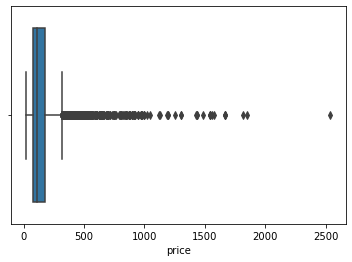

In [79]:

# Box Plot
import seaborn as sns
sns.boxplot(df['price'])

In [80]:
print(np.where(df['price']>700))

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


(array([ 822, 1303, 1319, 1399, 1669, 2638, 2642, 3341, 3376, 3383, 3386,
       3391, 3402, 3410, 3415, 3419, 3434, 3466, 3579, 3594, 3675, 3732,
       4745, 4750, 4818, 4821, 4844, 6296, 6337, 6353, 6359, 6367, 6373,
       6374, 6401, 6406, 6422, 6431, 6448, 6458, 6459, 6464, 6494, 6500,
       6504, 6506, 6521, 6525, 6531, 6532, 6552, 6899, 7575, 7619, 7626,
       7627, 7631, 7639, 7642, 7650, 7651, 7654, 7666, 7689, 7691, 7715,
       7740, 7742, 7743, 7754, 7762, 7766, 7767, 7769, 7778, 7787, 7789,
       7793, 7804, 7807, 7816, 7824, 7829, 7830, 7831, 8090], dtype=int64),)


In [81]:
df.shape

(8095, 597)